# **Project Name**    - FBI'S CRIME INVESTIGATION


##### **Project Type**    - TIME SERIES FORECASTING
##### **Contribution**    - Individual

# **Project Summary -**
The **FBI Crime Investigation Project** is a data science initiative which aim to leverage machine learning  and time series forecasting techniques to predict the crime patterns which improves safety of public in urban areas of United States. With rising crime rates and complex socio-economic dynamics influencing crime occurences, there is an urgent nned for law enforcement agencies  that adopt data driven decision-making tools that enable proactive policing  and optimal resource allocation.

This project focuses on analyzing historical crime data collected by law enforcement authorities, which includes information such as crime types, geographical locations, neighborhood identifiers for each of incidents occured. The aim of this project is to provide a valuable insights into the temporal and spatial distribution of criminal activities, thereby supporting more efficient deployment  of police resources and informed urban planning, by forecasting crime incidentson a monthly basis.

The project comprises of two datasets train and test which consists of crime records  with attributes like crime type,street block, neighborhood, location coordinates (X, Y, Latitude, Longitude),time of occurrence (hour and minute)and date components (year, month, day). This attributes allows for comprehensive EDA, spatial pattern identification and temporal trend analysis.

This project follows a structured data science pipeline aimed at forecasting monthly crime incidents and uncovering actionable insights for law enforcement and urban safety planning:

**Data Cleaning & Preparation:**
Handled missing values, removed outliers, and transformed raw data into an analysis-ready format.

**Exploratory Data Analysis (EDA):**
Conducted detailed Univariate, Bivariate, and Multivariate analyses with insightful visualizations to identify crime trends, peak hours, high-risk areas, and frequently occurring crime types.

**Hypothesis Testing:**
Validated assumptions about crime patterns using statistical tests based on EDA insights.

**Feature Engineering & Preprocessing:**
Encoded categorical variables, scaled numerical data, and created new time-based features to enhance model performance.

**Model Development:**
Built multiple models, including Linear Regression, Random Forest, XGBoost, and time series models like ARIMA and Prophet to predict crime incidents. Models were evaluated using MAE, RMSE, and R-squared.

**Model Tuning & Validation:**
Improved model accuracy through hyperparameter tuning and cross-validation.

**Model Explainability:**
Interpreted model results using feature importance tools to guide data-driven decision-making.

The entire project is developed using Python’s leading data science libraries, including Pandas, NumPy, Scikit-Learn, Statsmodels, XGBoost, Matplotlib, Seaborn, and GeoPandas for geospatial analysis.

In summary, this project not only equips law enforcement with predictive tools for crime incident forecasting but also highlights the broader potential of data science in enhancing public safety, optimizing resource allocation, and contributing to safer, smarter cities.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In recent years, urban areas across the U.S. have experienced rising crime rates and increasingly complex patterns of criminal activity. Law enforcement agencies now face the challenge of not just responding to incidents but proactively anticipating when and where crimes are likely to occur for better resource management and preventive action.

This project aims to build a predictive model that forecasts monthly crime incidents using historical data based on crime type, location, and time features. The goal is to help law enforcement, city planners, and community leaders anticipate crime trends, optimize resource allocation, and enhance public safety through data-driven insights.

# **General Guidelines** : -  



1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


# ***Let's Begin !***

## ***1. Know Your Data***


### Import Libraries

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
train_df = pd.read_excel("D:/Labmentix Projects/FBI - Time series Project-20250601T132504Z-1-001/FBI - Time series Project/Train.xlsx")
test_df = pd.read_csv("D:/Labmentix Projects/FBI - Time series Project-20250601T132504Z-1-001/FBI - Time series Project/Test (2).csv")


### Dataset First View

In [75]:
train_df.head()

,TYPE,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date,DAY_NAME,Day_Type,Time_Slot,Day_Name,Is_Weekend,Incident_Counts
0,Other Theft,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12,Wednesday,Weekday,Afternoon,Wednesday,Weekday,223
1,Other Theft,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07,Friday,Weekday,Afternoon,Friday,Weekday,223
2,Other Theft,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23,Friday,Weekday,Afternoon,Friday,Weekday,235
3,Other Theft,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20,Tuesday,Weekday,Morning,Tuesday,Weekday,235
4,Other Theft,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12,Monday,Weekday,Afternoon,Monday,Weekday,235


In [4]:
test_df.head()

,YEAR,MONTH,TYPE,Incident_Counts
0,2013,6,Vehicle Collision or Pedestrian Struck (with I...,NaN
1,2013,6,Theft of Vehicle,NaN
2,2013,6,Theft of Bicycle,NaN
3,2013,6,Theft from Vehicle,NaN
4,2013,6,Other Theft,NaN


### Dataset Rows & Columns count

In [5]:
# Number of rows and columns in train and test datasets
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)

Train Data Shape: (474565, 13)
Test Data Shape: (162, 4)


### Dataset Information

In [6]:
#Dataset info of train data
print("Dataset info of train:")
train_df.info()

#Dataset info of test data
print("Dataset info of test:")
test_df.info()

Dataset info of train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB
Data

### Check for Duplicate Values

In [7]:
# Checking for duplicate rows in train data
print("Duplicate records in train data \n", train_df.duplicated().sum())

# Checking for duplicate rows in test data

print("Duplicate records in test data: \n",test_df.duplicated().sum())

Duplicate records in train data 
 44618
Duplicate records in test data: 
 0


### Checking for Missing Values/Null Values

In [8]:
#Checking for null values in train data
print("Null values in train data:\n", train_df.isnull().sum())

#Checking for null values in test dat
print("Null values in test dat:\n", test_df.isnull().sum())

Null values in train data:
 TYPE                 0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
X                    0
Y                    0
Latitude             0
Longitude            0
HOUR             49365
MINUTE           49365
YEAR                 0
MONTH                0
DAY                  0
Date                 0
dtype: int64
Null values in test dat:
 YEAR                 0
MONTH                0
TYPE                 0
Incident_Counts    162
dtype: int64


### Visualizing missing Values

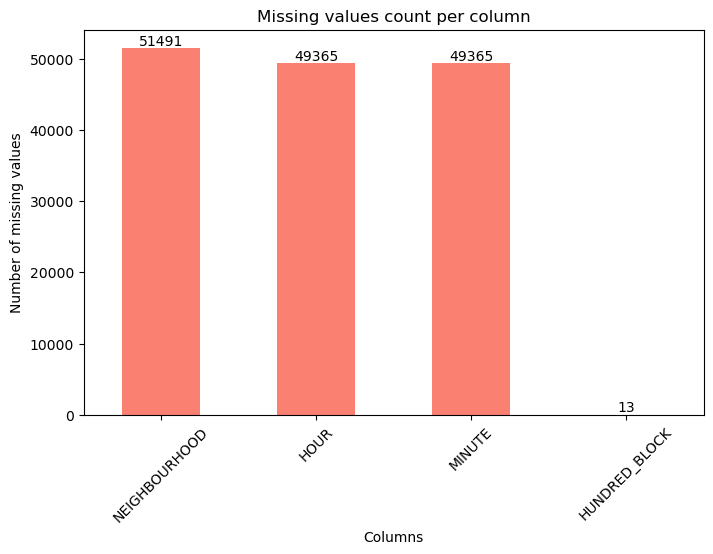

In [9]:
#visualizing missing values for train data
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
  plt.figure(figsize=(8,5))
  missing_values.sort_values(ascending=False).plot(kind='bar',color='salmon')
  plt.title("Missing values count per column")
  plt.xlabel("Columns")
  plt.ylabel("Number of missing values")
  plt.xticks(rotation=45)


  #  Add value labels on top of each bar
  ax = plt.gca()
  for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
         ha='center', va='bottom', fontsize=10, color='black')

  plt.show()

else:
  print("No missing values found in the dataset.")

### What did you know about your dataset?

After exploring the dataset structure, the following observations were made:


*   The training dataset contains records of crime incidents, with attributes including:Crime type,Location details (street block, neighborhood, coordinates),Date and time details (year, month, day, hour, minute, and full date)
    

*   The test dataset includes: Year, month, and crime type,The target variable (incident count) is missing, which we need to predict.


*   There are 44618 duplicate records in train dataset,which leads to data redundancy.



*   A missing values were detected in certain columns of the training data, requiring appropriate handling during data preprocessing.
*   The dataset is well-structured for conducting both spatial and temporal analysis, with rich date-time information for extracting additional features like day of the week, seasonality, and peak crime hours.





## ***2. Understanding Your Variables***

### Columns of dataset

In [10]:
# List of columns in train and test dataset
print("Columns in train data:\n",train_df.columns.tolist())
print("Columns in test data:\n", test_df.columns.tolist())

Columns in train data:
 ['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude', 'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date']
Columns in test data:
 ['YEAR', 'MONTH', 'TYPE', 'Incident_Counts']


### Dataset description
| 🏷️ Column Name         | 📖 Description                              |
| :---------------------- | :------------------------------------------ |
| **TYPE**                | Type/category of crime                      |
| **HUNDRED\_BLOCK**      | Street block where the crime occurred       |
| **NEIGHBOURHOOD**       | Neighborhood of the incident                |
| **X, Y**                | X and Y coordinates of crime location       |
| **Latitude, Longitude** | Geographic coordinates                      |
| **HOUR, MINUTE**        | Time of occurrence                          |
| **YEAR, MONTH, DAY**    | Date components                             |
| **Date**                | Full date in YYYY-MM-DD format              |
| **Count (target)**      | Number of crime incidents (train data only) |


In [11]:
#Summary Statistics
train_df.describe().T


,count,mean,min,25%,50%,75%,max,std
X,474565.0,441028.01822,0.0,489916.53,491477.85,493610.19,511303.0,150295.319332
Y,474565.0,4889022.851684,0.0,5453572.36,5456819.64,5458622.34,5512579.0,1665850.060645
Latitude,474565.0,44.138029,0.0,49.234871,49.264051,49.2803,49.755314,15.039271
Longitude,474565.0,-110.301025,-124.549757,-123.127383,-123.107058,-123.065646,0.0,37.583147
HOUR,425200.0,13.721263,0.0,9.0,15.0,19.0,23.0,6.785751
MINUTE,425200.0,16.736047,0.0,0.0,10.0,30.0,59.0,18.354675
YEAR,474565.0,2004.363632,1999.0,2001.0,2004.0,2008.0,2011.0,3.850689
MONTH,474565.0,6.5557,1.0,4.0,7.0,9.0,12.0,3.408676
DAY,474565.0,15.439253,1.0,8.0,15.0,23.0,31.0,8.759352
Date,474565,2004-11-11 23:51:07.470209792,1999-01-01 00:00:00,2001-06-06 00:00:00,2004-05-18 00:00:00,2008-03-27 00:00:00,2011-12-31 00:00:00,NaN


### Check Unique Values for Each Column

In [12]:
# Check number of unique values in each column of train data
train_df.nunique()

TYPE                 9
HUNDRED_BLOCK    20566
NEIGHBOURHOOD       24
X                84225
Y                82768
Latitude         89488
Longitude        87190
HOUR                24
MINUTE              60
YEAR                13
MONTH               12
DAY                 31
Date              4748
dtype: int64

### Variables description


*  The dataset contains a mix of categorical (e.g., TYPE, NEIGHBOURHOOD) and numerical (e.g., X, Y, Latitude, Longitude, HOUR, MINUTE, YEAR, MONTH, DAY) variables.
*   The target variable is Count in the train dataset, representing the number of incidents.


*   Variables like YEAR, MONTH, DAY, HOUR, MINUTE can be used for extracting additional time-based features
*   Latitude and Longitude are valuable for spatial pattern analysis and geospatial visualizations.


*  There is  a good scope for feature engineering from the date and time columns to improve model performance.







## 3. ***Data Wrangling***

###  Remove Duplicate Records

In [13]:
# Remove duplicate records
train_df.drop_duplicates(inplace=True)

In [14]:
# Check shape after removing duplicates
print("Shape after removing duplicates:", train_df.shape)

Shape after removing duplicates: (429947, 13)


### Handle Missing Values

In [15]:
#  1. Check Missing Values Again (after dropping duplicates)
train_df.isnull().sum()

TYPE                0
HUNDRED_BLOCK      13
NEIGHBOURHOOD    6873
X                   0
Y                   0
Latitude            0
Longitude           0
HOUR             4747
MINUTE           4747
YEAR                0
MONTH               0
DAY                 0
Date                0
dtype: int64

In [16]:
#Drop rows with missing HUNDRED_BLOCK values (only 13 records)
train_df = train_df[train_df['HUNDRED_BLOCK'].notnull()]

In [17]:
# Fill missing NEIGHBOURHOOD with 'Unknown'
train_df['NEIGHBOURHOOD'].fillna('Unknown', inplace=True)


In [18]:
# Fill missing HOUR and MINUTE with their respective median values
train_df['HOUR'].fillna(train_df['HOUR'].median(),inplace=True)
train_df['MINUTE'].fillna(train_df['MINUTE'].median(),inplace=True)

In [19]:
#Checking missing values again
print("Missing values after handling:", train_df.isnull().sum())

Missing values after handling: TYPE             0
HUNDRED_BLOCK    0
NEIGHBOURHOOD    0
X                0
Y                0
Latitude         0
Longitude        0
HOUR             0
MINUTE           0
YEAR             0
MONTH            0
DAY              0
Date             0
dtype: int64


### What all manipulations have you done and insights you found?
*   **Dropped 13 records** with missing HUNDRED_BLOCK
values to maintain data quality.
*   **Replaced 6873 missing values** in NEIGHBORHOOD with Unknown to preserve those records for analysis.
*   **Imputed 4747 missing values** each in HOUR and MINUTE columns with their median values, minimizing distortion of temporal trends while retaining data.
* Now the dataset has no missing values and is clean and ready for EDA and modelling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart- 1:Crime Type Distribution

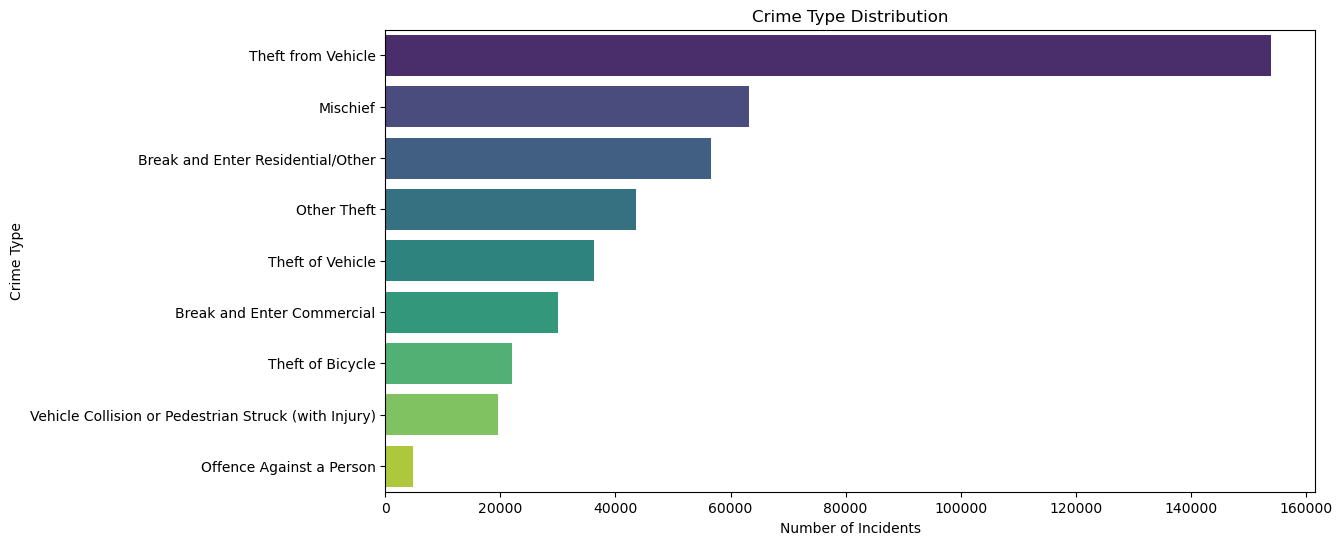

In [20]:
plt.figure(figsize =(12,6))
sns.countplot(y='TYPE',data=train_df,order=train_df['TYPE'].value_counts().index,palette ='viridis')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.title('Crime Type Distribution')
plt.show()

#### 1. Why did you pick the specific chart?
To see which crimes are most frequent.

#### 2. What is/are the insight(s) found from the chart?
Certain crime types like Theft and Assault appear much more frequently than others, indicating specific areas of focus for law enforcement

#### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
 Yes — by identifying the most frequent crime types, law enforcement can allocate resources more effectively and launch awareness campaigns targeting those crime categories.
  - However, a disproportionately high frequency of specific crimes indicates a negative public safety trend, which can harm the city’s image, reduce investor confidence, and discourage tourism and community growth.

#### Chart-2: Crime Incidents by Year

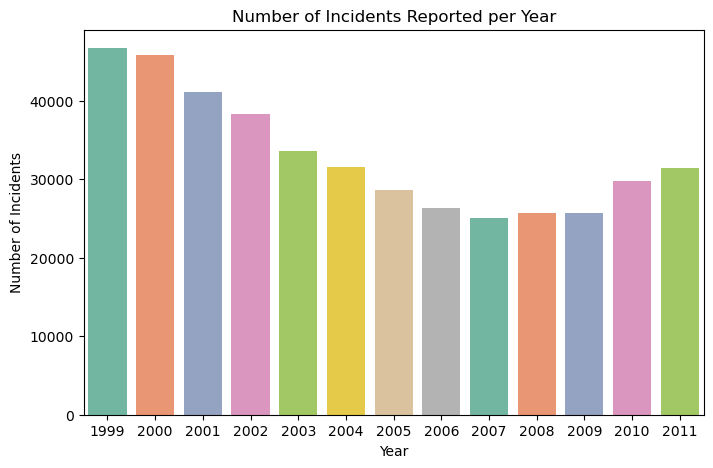

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='YEAR', data=train_df, palette='Set2')
plt.title('Number of Incidents Reported per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()


#### 1. Why did you pick the specific chart?
 For determining whether crime rates have increased, decreased, or remained constant over time.

#### 2. What is/are the insight(s) found from the chart?
Crime incidents fluctuate year-to-year, with some years witnessing higher crime counts than others. These trends may reflect the effectiveness (or lapses) in law enforcement strategies or socio-economic factors influencing crime rates.

#### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Yes — tracking yearly trends helps assess public safety strategies’ effectiveness and plan future actions based on historical patterns.
-  A noticeable rise in incidents in certain years reveals negative growth in safety, increasing public fear, reducing neighborhood appeal, and potentially impacting property values and local economies.

#### Chart-3: Incidents by Hour

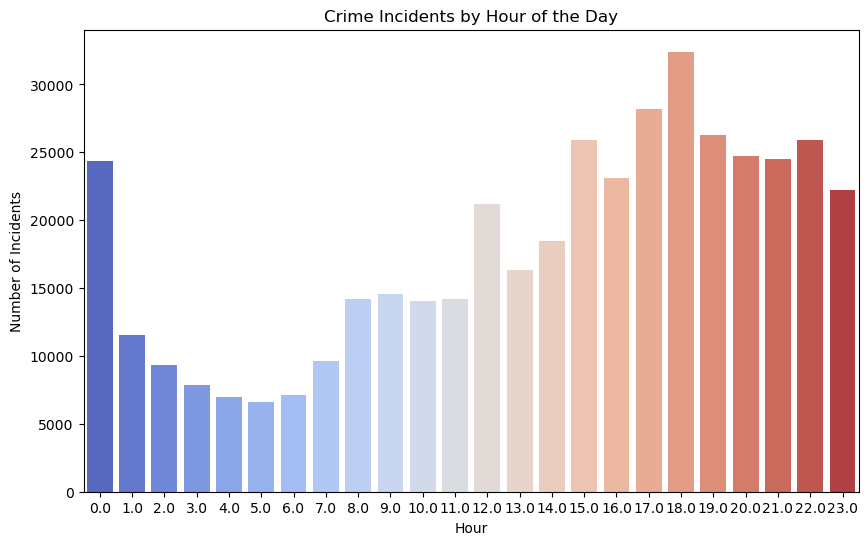

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='HOUR', data=train_df, palette='coolwarm')
plt.title('Crime Incidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Incidents')
plt.show()


#### 1.Why did you pick the specific chart?
A countplot of crime incidents by hour reveals crime distribution across different times of the day. It helps identify high-risk periods and understand daily crime patterns.

#### 2.  What is/are the insight(s) found from the chart?
Crimes peak during specific hours, especially late evening and early morning, while fewer incidents occur during early daytime hours.

#### 3.  Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.
Yes — this insight allows for optimized patrol scheduling, targeted night-time surveillance, and public awareness campaigns during high-risk hours, enhancing overall safety.
-  However, higher crime rates during late hours negatively affect night-time businesses, public events, and transportation services, limiting the city's night-time economy potential and reducing community activity after dark.

### Chart-4: Crime Incidents by Month

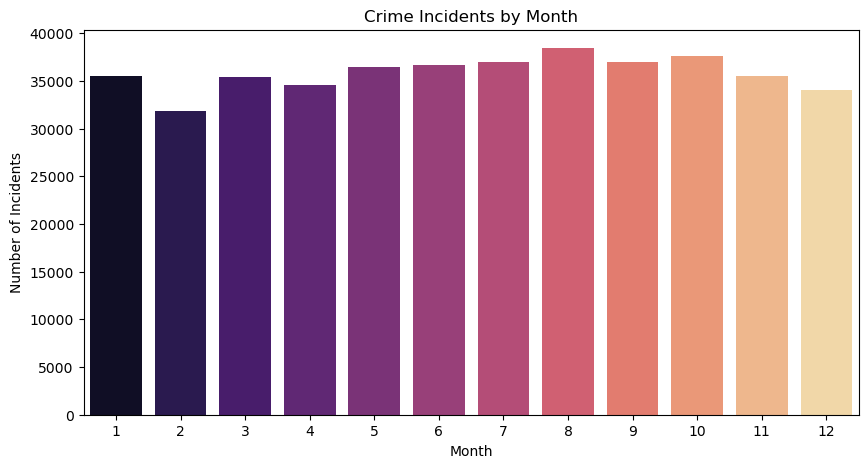

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x="MONTH", data = train_df, palette="magma")
plt.title("Crime Incidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.show()

#### 1.Why did you pick the specific chart?
To explore seasonal or monthly crime patterns and identify periods with higher or lower crime rates throughout the year.

#### 2.What is/are the insight(s) found from the chart?
Some months, particularly summer and year-end months, tend to record higher numbers of crimes, while others show relatively lower activity.

#### 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.
 Yes — law enforcement can plan special safety initiatives and allocate more resources during high-risk months.
- If certain months consistently show rising crime rates, it may deter seasonal business activity (like tourism and events) and harm public sentiment during those periods.

### Chart-5: Crime Incidents by Minute


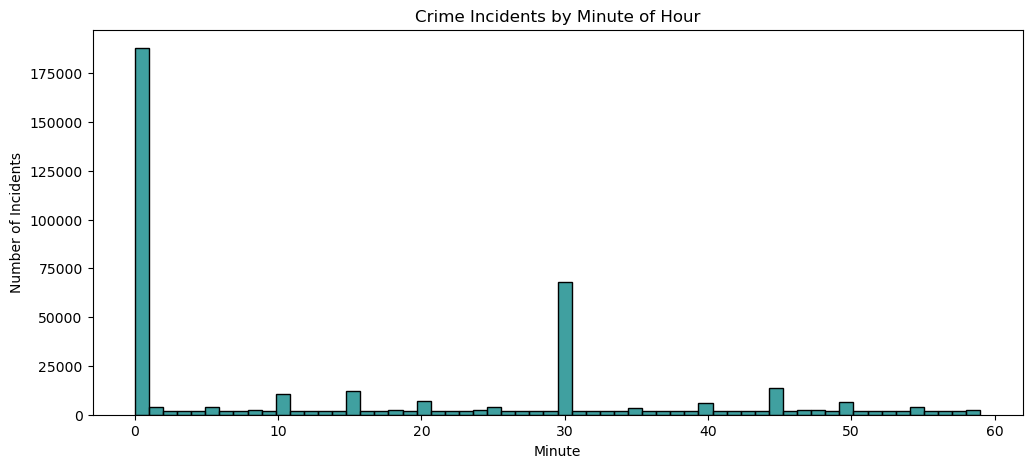

In [24]:
plt.figure(figsize=(12,5))
sns.histplot(train_df['MINUTE'],bins = 60, kde = False, color= 'teal')
plt.title("Crime Incidents by Minute of Hour")
plt.xlabel("Minute")
plt.ylabel("Number of Incidents")
plt.show()

#### 1.Why did you pick the specific chart?
To check if any specific minutes within an hour experience a higher frequency of crime, and assess whether incident reporting clusters around particular times.

#### 2.What is/are the insight(s) found from the chart?
Crime incidents are quite uniformly distributed across minutes, with minor spikes at certain points — likely reflecting reporting patterns (e.g., on the hour or at half-past).

#### 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.
This shows incident reports happen across all minutes, understanding time clustering can improve dispatch response scheduling.
- No major negative growth impact here — but irregular clustering could hint at delays or biases in incident reporting systems.

### Chart-6: Crime Incidents by Neighborhood(Top 20)


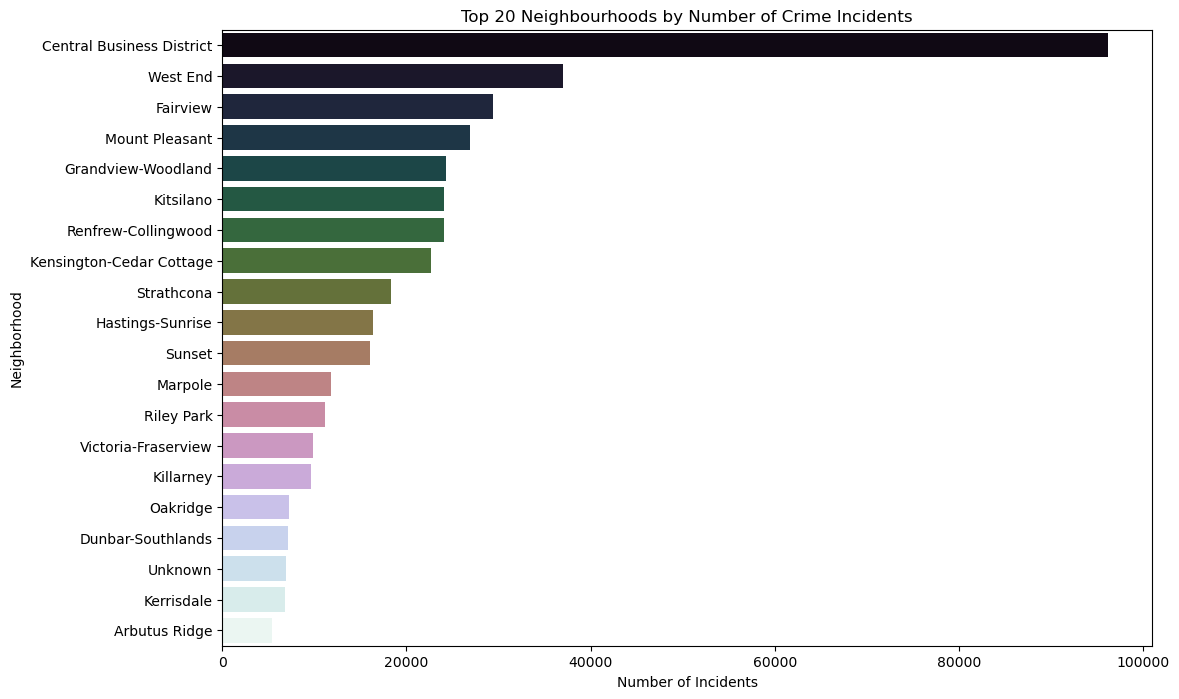

In [25]:
plt.figure(figsize= (12,8))
top_20_neigh = train_df['NEIGHBOURHOOD'].value_counts().head(20)
sns.barplot(x=top_20_neigh.values, y=top_20_neigh.index, palette='cubehelix')
plt.title('Top 20 Neighbourhoods by Number of Crime Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Neighborhood')
plt.show()

####  1.Why did you pick the specific chart?
To identify high-crime neighbourhoods and determine which areas require focused safety interventions and community programs.

####  2. What is/are the insight(s) found from the chart?
A handful of neighbourhoods report far higher crime rates than others, highlighting crime hotspots within the city.

#### 3.Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.
Yes — identifying high-crime areas allows targeted policing, community outreach, and infrastructure improvements.
- Persistently high crime in certain neighbourhoods negatively impacts property values, business investments, and local quality of life.

### Chart-7: Crime Type Vs Hour

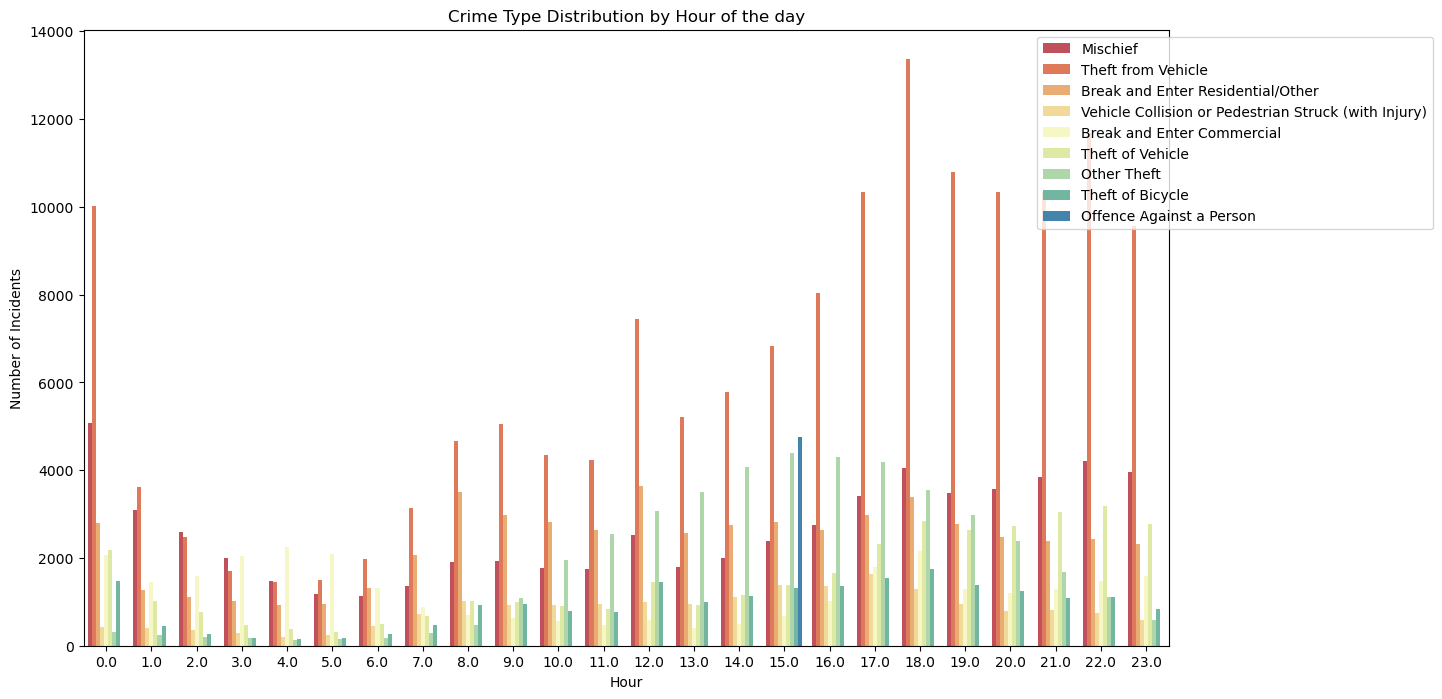

In [26]:
plt.figure(figsize = (14,8))
sns.countplot(x = 'HOUR' , hue ='TYPE', data = train_df, palette='Spectral')
plt.title('Crime Type Distribution by Hour of the day')
plt.xlabel('Hour')
plt.ylabel('Number of Incidents')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

#### 1.Why did you pick the specific chart?
To analyze how different crime types are distributed over hours of the day, identifying when specific types of crimes are most likely to occur

#### 2. What is/are the insight(s) found from the chart?
Certain crimes like Assault and Theft peak during late evening and early morning, while other crimes are more evenly distributed.

#### 3.Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.
Yes  this enables law enforcement to schedule specialized units or patrols during hours when certain crimes spike.
- If crimes concentrate heavily during specific periods, it can negatively affect businesses operating at those times (restaurants, clubs, transportation), leading to reduced economic activity after dark.

### Chart 8: Crime Type Vs Year

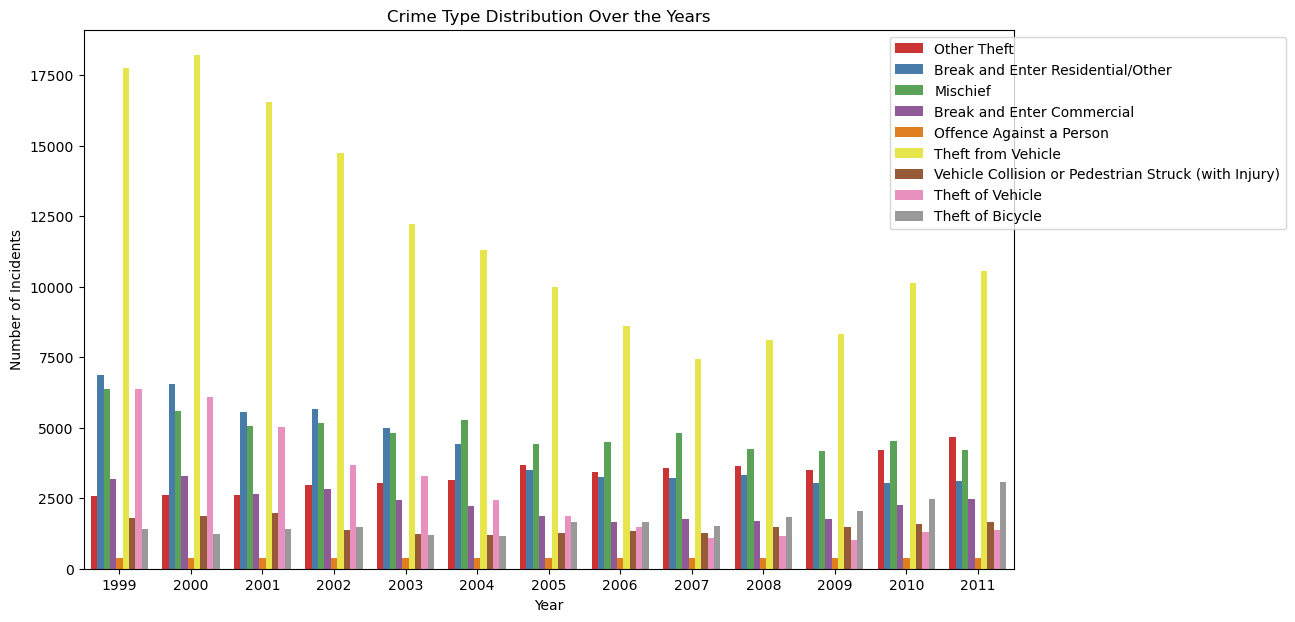

In [27]:
plt.figure(figsize=(12,7))
sns.countplot(x='YEAR', hue='TYPE', data=train_df, palette='Set1')
plt.title('Crime Type Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


#### 1.Why did you pick the specific chart?
To observe how crime types have trended over the years, identifying increases or decreases in specific categories over time.

#### 2. What is/are the insight(s) found from the chart?
While overall crime numbers fluctuate yearly, some crime types show increasing trends, while others decline, reflecting shifting crime patterns

#### 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.
Yes — it highlights which crime categories need increased attention or public awareness campaigns in specific years.
- Rising trends in serious crimes indicate a negative public safety trend, impacting a city’s reputation, property prices, and general business confidence

### Chart 9: Number of Crimes vs Neighbourhood (for a Specific Crime Type)

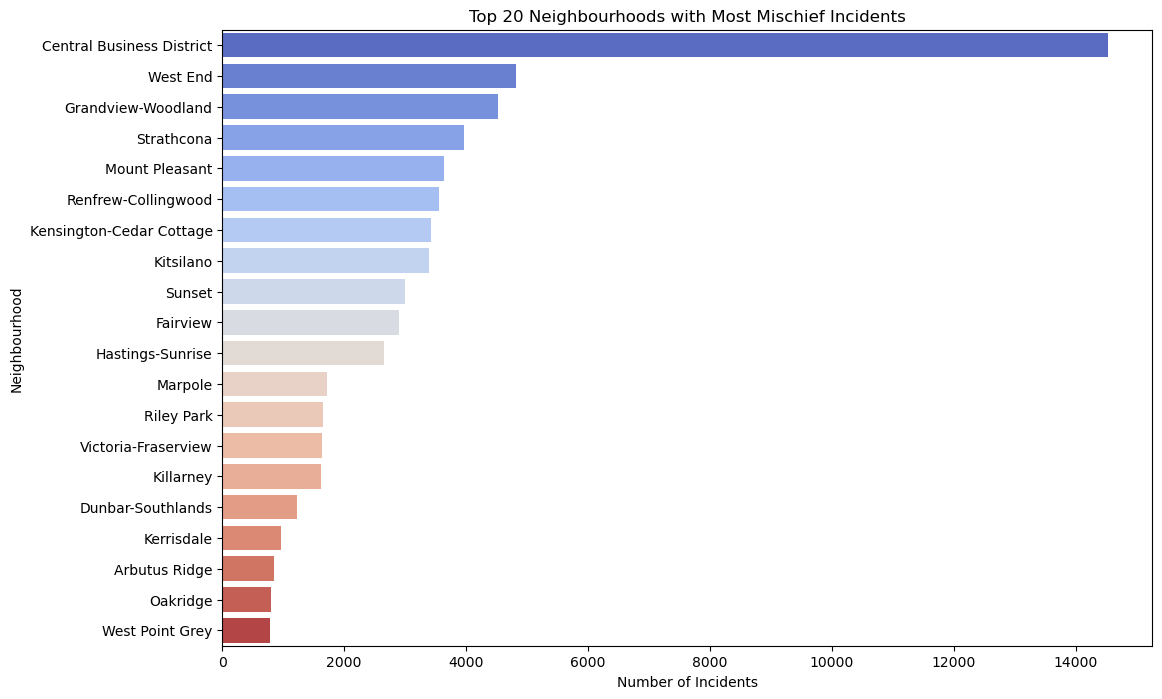

In [28]:
plt.figure(figsize=(12,8))
mischief_counts = train_df[train_df['TYPE'] == 'Mischief']['NEIGHBOURHOOD'].value_counts().head(20)
sns.barplot(x=mischief_counts.values, y=mischief_counts.index, palette='coolwarm')
plt.title('Top 20 Neighbourhoods with Most Mischief Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Neighbourhood')
plt.show()


#### 1. Why did you pick the specific chart?
To identify which neighbourhoods report the highest number of a specific crime type, enabling focused safety interventions.

#### 2. What is/are the insight(s) found from the chart?
A small set of neighbourhoods report far more Mischief incidents than others, highlighting localized problem areas within the city.

#### 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.
Yes — by identifying neighbourhoods prone to Mischief, law enforcement and local authorities can deploy preventive strategies, increase patrol visibility, and engage communities to reduce vandalism and property damage.
- Persistently high Mischief rates can lead to property devaluation, discourage new businesses, and negatively affect the neighborhood’s reputation, impacting long-term economic and social growth.

### Chart 10: Number of Incidents by Hour vs Neighbourhood (Top 10 Neighbourhoods)

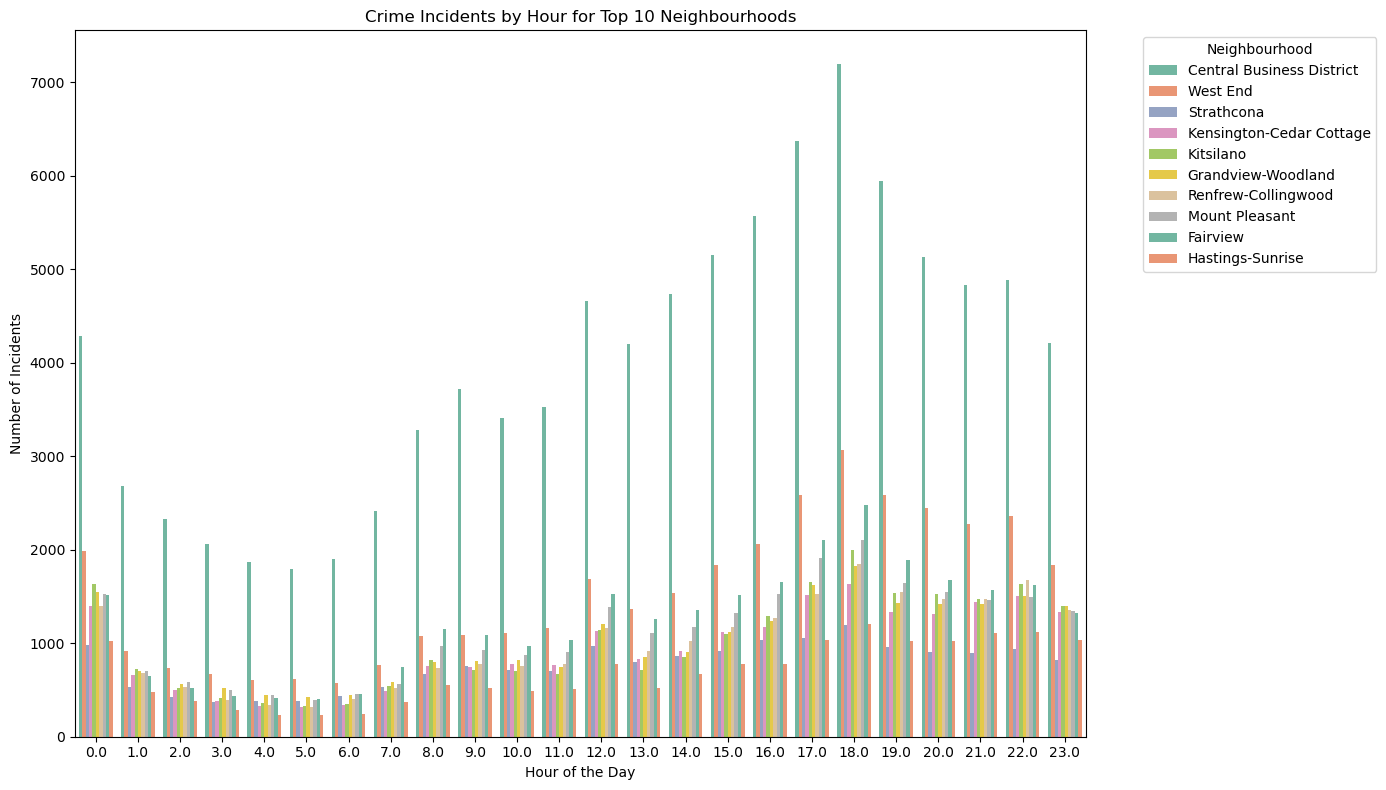

In [34]:
top_neigh = train_df['NEIGHBOURHOOD'].value_counts().head(10).index
filtered_df = train_df[train_df['NEIGHBOURHOOD'].isin(top_neigh)]

plt.figure(figsize=(14,8))
sns.countplot(x='HOUR', hue='NEIGHBOURHOOD', data=filtered_df, palette='Set2')
plt.title('Crime Incidents by Hour for Top 10 Neighbourhoods')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?
To compare hourly crime distribution patterns among the top 10 high-crime neighbourhoods, revealing local crime timing trends.

#### 2. What is/are the insight(s) found from the chart?
Some neighbourhoods consistently report higher incidents during late evening hours, while others have more daytime activity.

#### 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.
Yes — helps local police departments assign personnel based on peak risk times per area.
- Areas with consistently high night-time crime rates may experience reduced property demand and discourage nightlife, harming local economies.

### Chart 11: Crime Count vs Month by Type (Top 5 Crime Types)


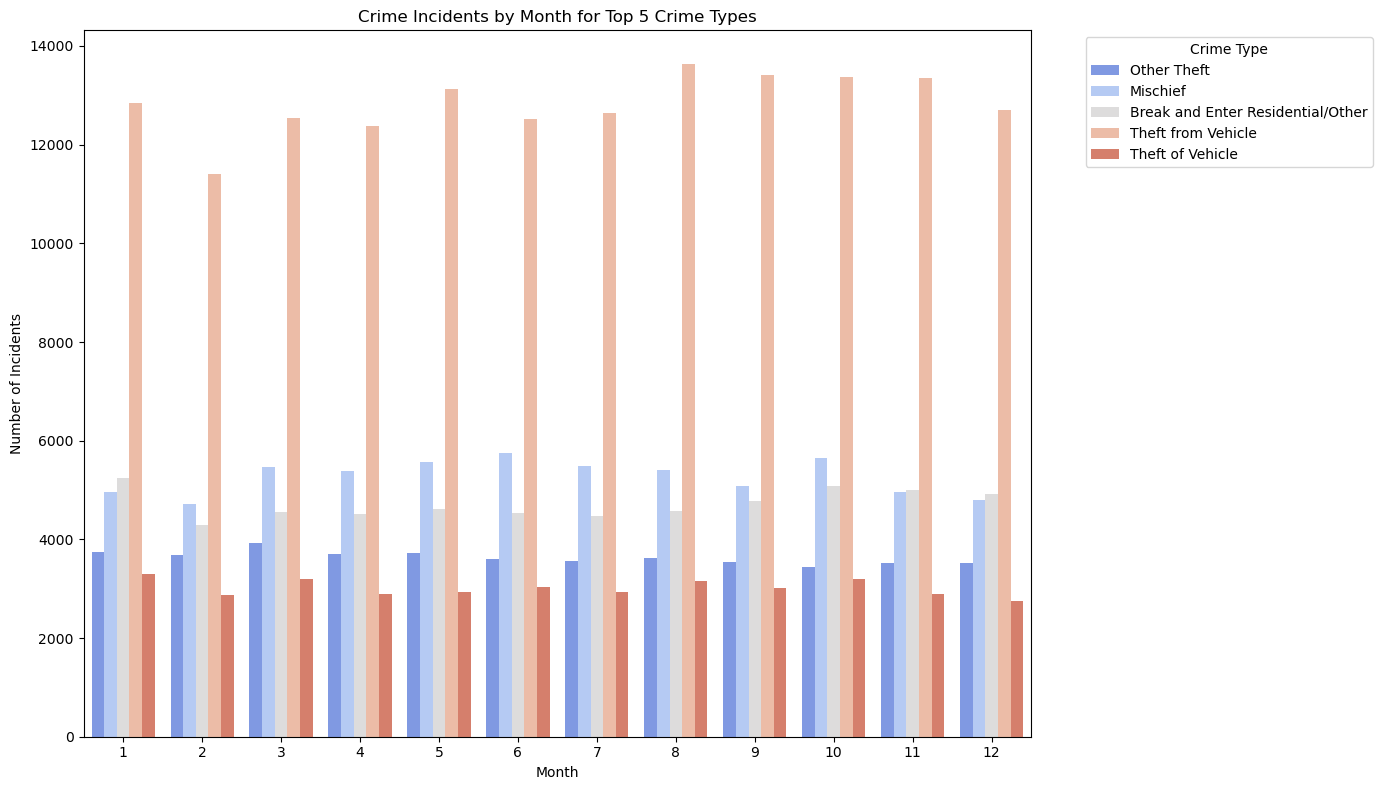

In [35]:
top_types = train_df['TYPE'].value_counts().head(5).index
filtered_df = train_df[train_df['TYPE'].isin(top_types)]

plt.figure(figsize=(14,8))
sns.countplot(x='MONTH', hue='TYPE', data=filtered_df, palette='coolwarm')
plt.title('Crime Incidents by Month for Top 5 Crime Types')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 1.Why did you pick the specific chart?
To detect seasonal patterns for the most common crime types and determine if specific months trigger spikes in certain categories.

#### 2.What is/are the insight(s) found from the chart?
Some crime types, like Theft and Assault, spike in summer and year-end months, while others remain relatively stable.

#### 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.
Yes — allows public safety campaigns and special task forces during high-crime months per crime type.
- If left unchecked, seasonally spiking crime rates can discourage tourism, seasonal markets, and outdoor events, harming local businesses.

### Chart 12 :Number of Incidents by Crime Type and Day of the Week

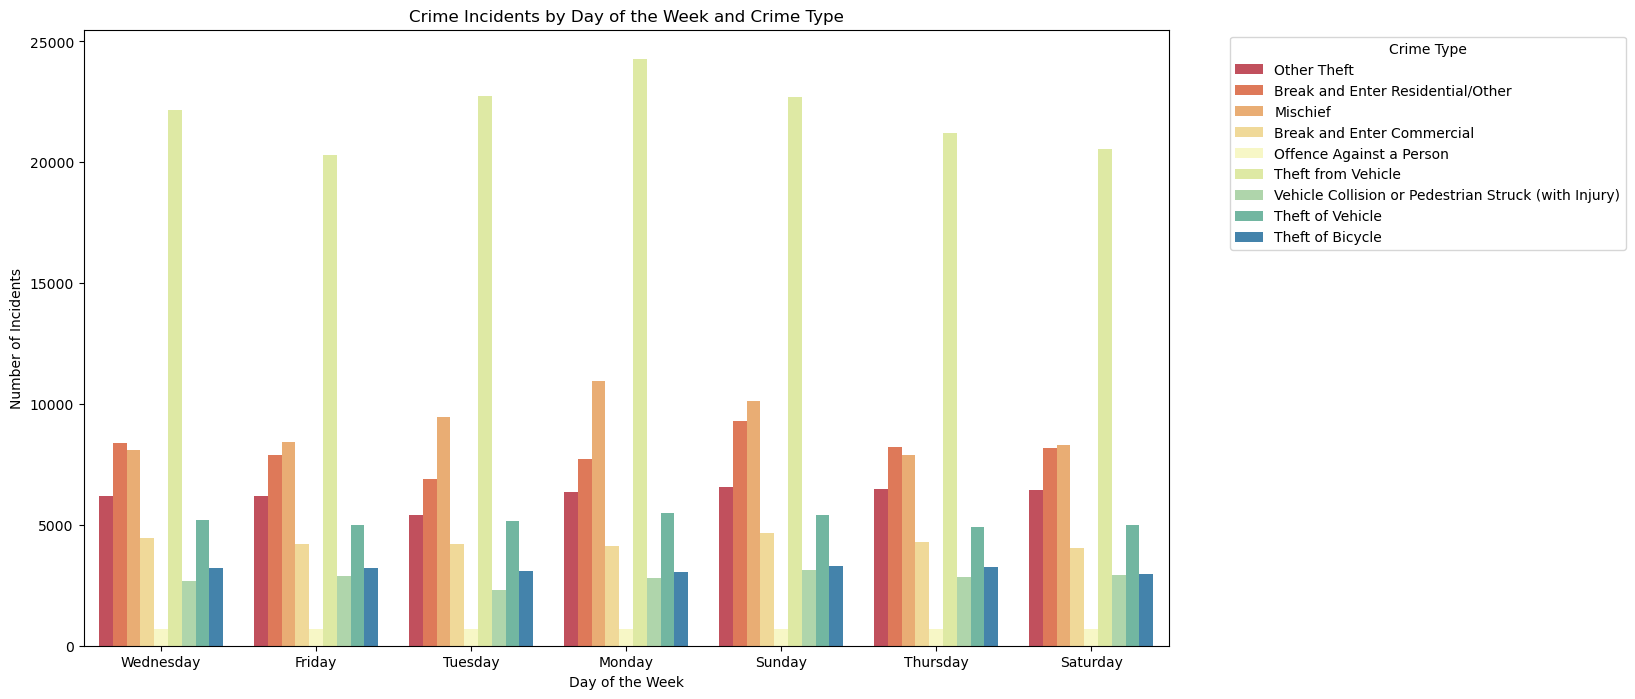

In [36]:
train_df['DAY_NAME'] = pd.to_datetime(train_df['Date']).dt.day_name()

plt.figure(figsize=(14,8))
sns.countplot(x='DAY_NAME', hue='TYPE', data=train_df, palette='Spectral')
plt.title('Crime Incidents by Day of the Week and Crime Type')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### 1. Why did you pick the specific chart?
To assess how crime type distributions shift across days of the week and identify high-risk weekdays or weekends.

#### 2. What is/are the insight(s) found from the chart?
Certain crimes, like Assault, increase on weekends, while others like Theft remain steady across the week.

#### 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.
Yes — helps optimize weekend patrol units, nightlife area monitoring, and weekend safety campaigns.
-  High weekend crime rates, if unmanaged, can harm local business revenues from nightlife, dining, and entertainment venues.

### Chart 13 — Crimes by Month vs Neighbourhood (Top 5 Neighbourhoods)

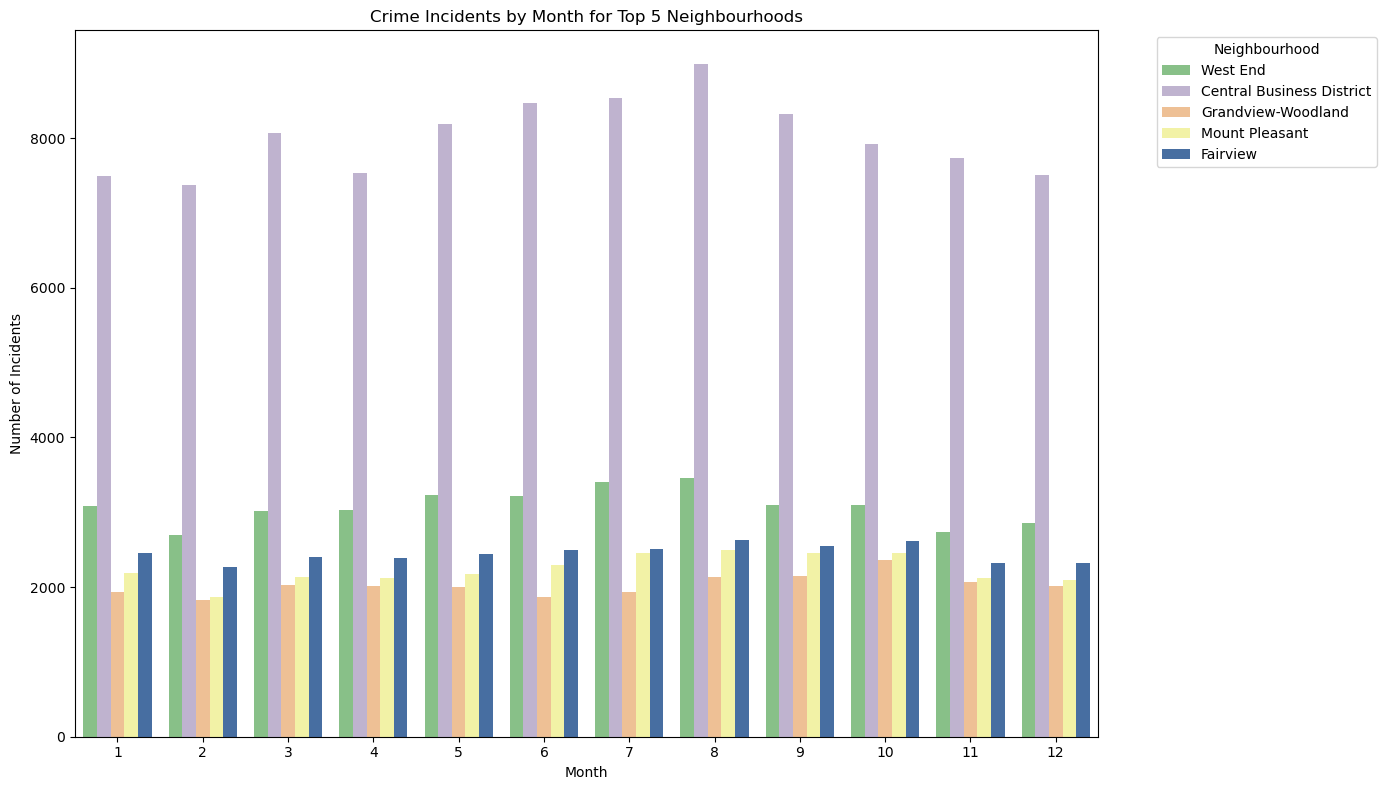

In [37]:
top_neigh = train_df['NEIGHBOURHOOD'].value_counts().head(5).index
filtered_df = train_df[train_df['NEIGHBOURHOOD'].isin(top_neigh)]

plt.figure(figsize=(14,8))
sns.countplot(x='MONTH', hue='NEIGHBOURHOOD', data=filtered_df, palette='Accent')
plt.title('Crime Incidents by Month for Top 5 Neighbourhoods')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 1.Why did you pick the specific chart?
To analyze monthly crime patterns in the highest-risk neighbourhoods and check if seasonal fluctuations differ by location.

#### 2.What is/are the insight(s) found from the chart?
Some neighbourhoods consistently face higher crime rates during summer and holiday months, while others fluctuate differently.

#### 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.
Yes — city police can tailor patrol and resource deployment plans per neighbourhood based on monthly risk patterns.
- Neighbourhoods with unchecked seasonal crime spikes can face reputational damage, reduced foot traffic, and declining property values.

### Chart 14 — Correlation Heatmap of Numerical Features

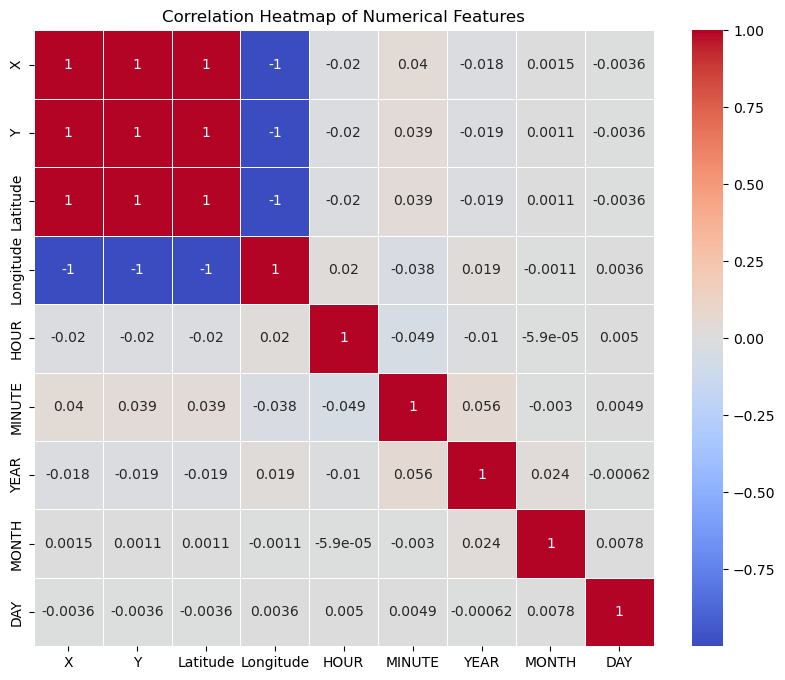

In [38]:
# Select only numeric columns for correlation analysis
numeric_cols = train_df.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


#### 1. Why did you pick the specific chart?
A correlation heatmap quickly reveals linear relationships between numerical variables, helping identify multicollinearity, redundant features, or meaningful associations before modeling.

#### 2.What is/are the insight(s) found from the chart?
As expected, strong positive correlations were observed between X and Longitude, and Y and Latitude, as both represent the same spatial positions in different coordinate systems. Other features like HOUR, MINUTE, DAY, MONTH showed weak or no correlations, indicating good feature independence.

#### 3.Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.
Yes — identifying strongly correlated numeric features helps prevent multicollinearity, improving model stability and prediction accuracy.
- Ignoring highly correlated or redundant variables can lead to biased models, overfitting, and less reliable crime trend forecasts, ultimately weakening operational decision-making and public trust.

### Chart 15:Pairplot (Scatter Matrix)

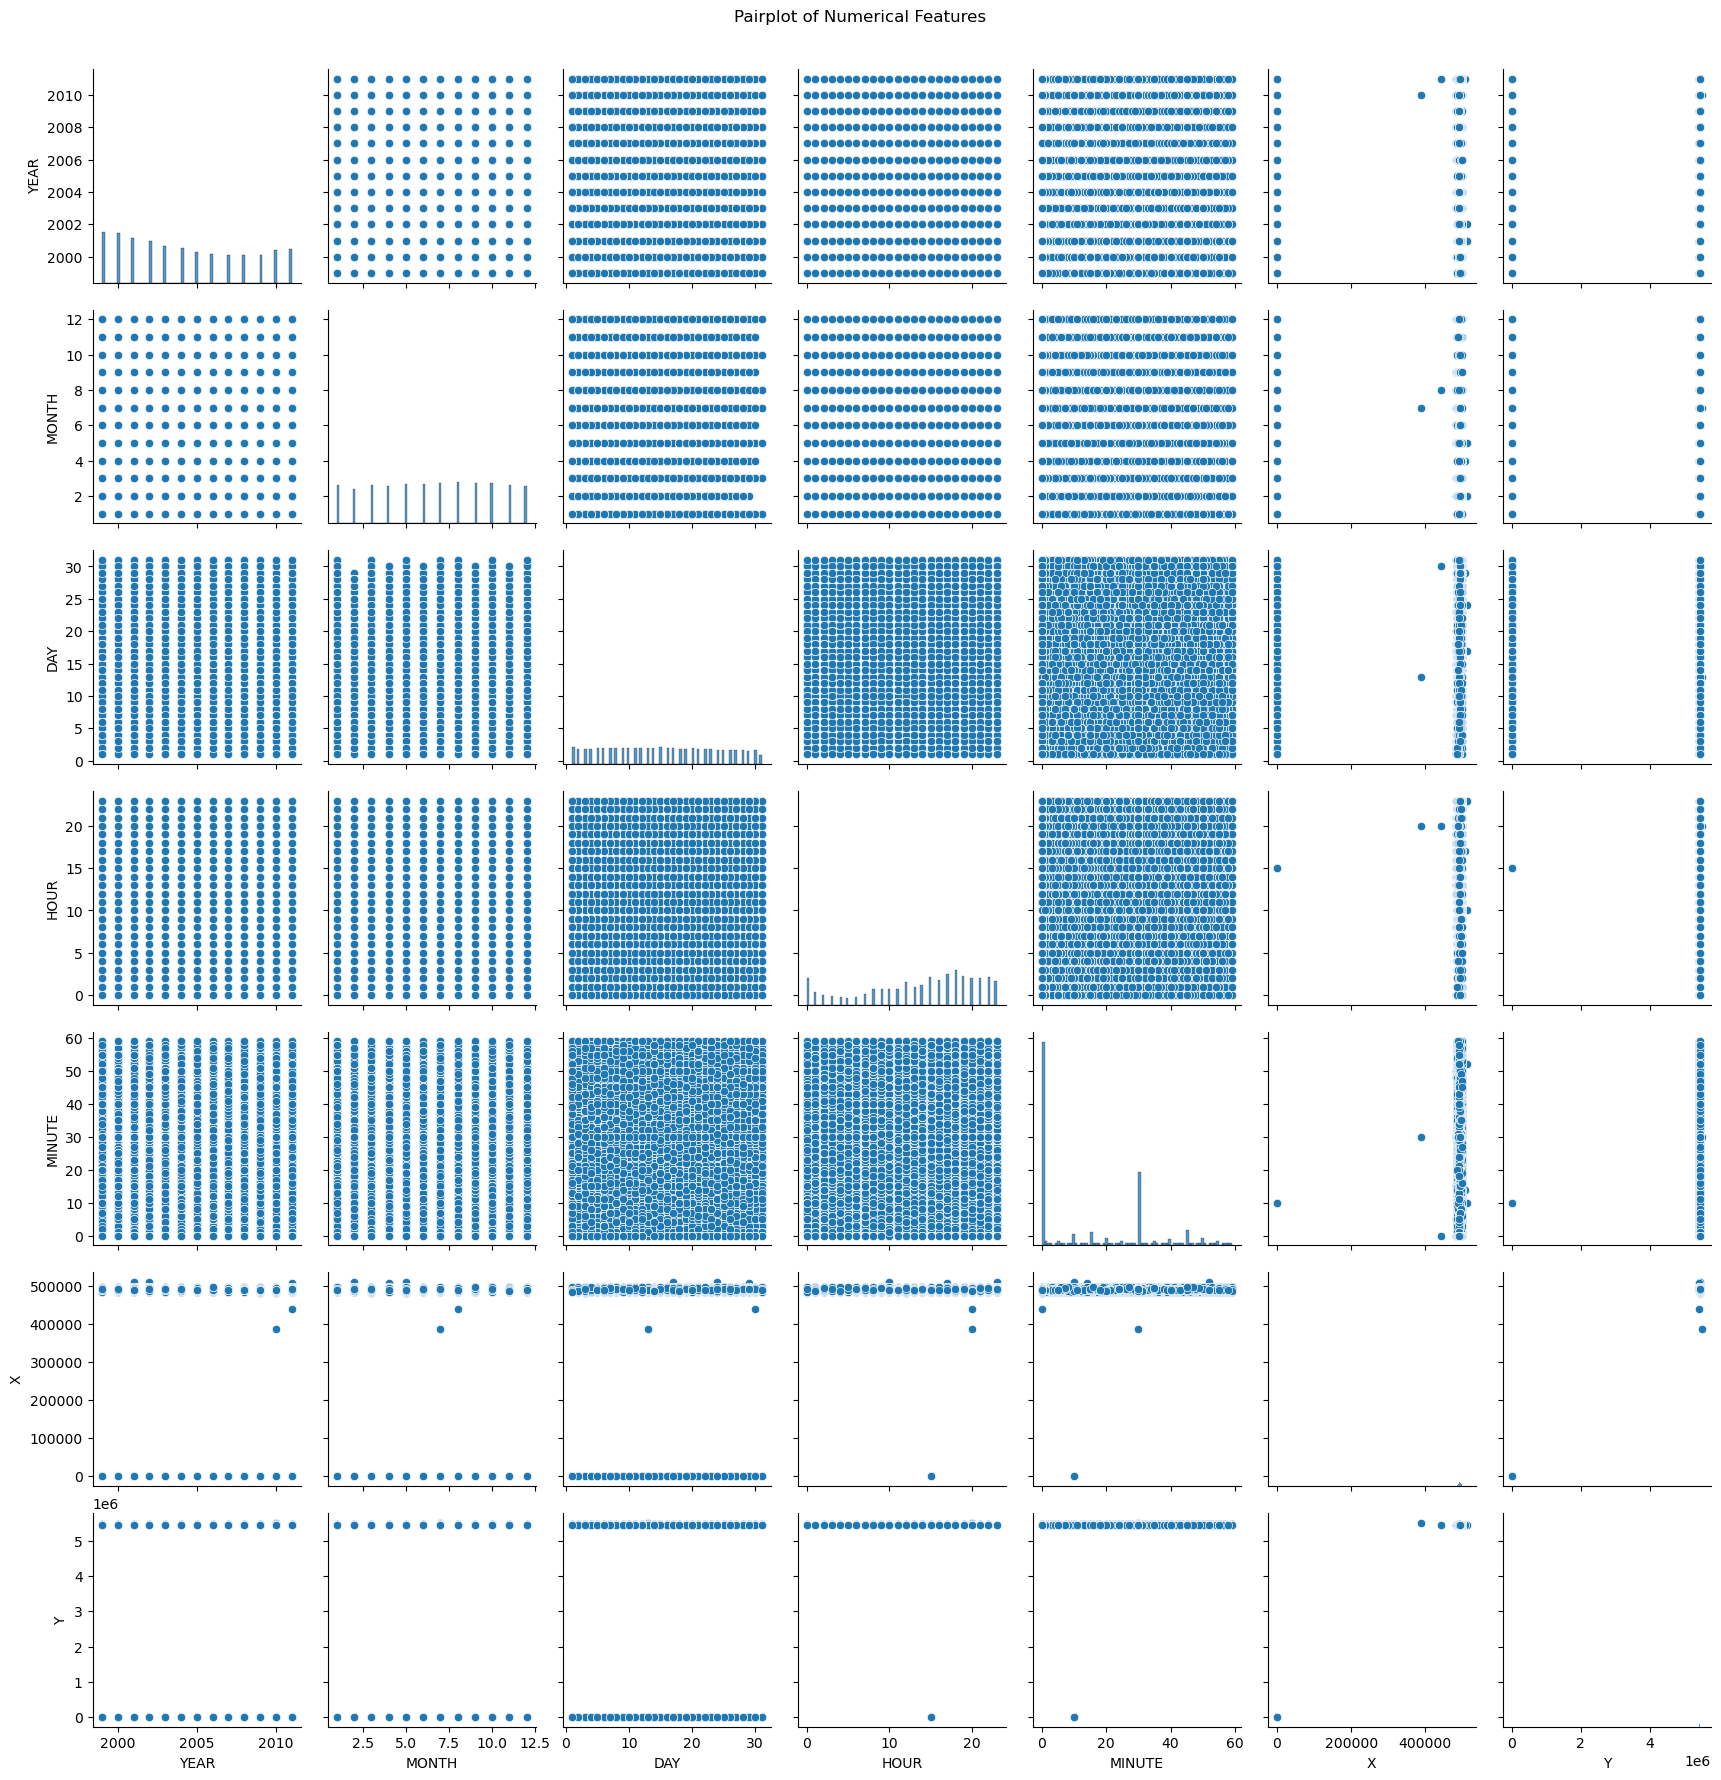

In [39]:
sns.pairplot(train_df[['YEAR','MONTH','DAY','HOUR','MINUTE','X','Y']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


#### 1.Why did you pick the specific chart?
A pairplot visualizes relationships between numerical features through scatter plots and histograms, helping detect trends, clusters, or anomalies.

#### 2.What is/are the insight(s) found from the chart?
Most features show no strong linear relationship, but clusters or patterns appear along some axes, like X vs Y (geospatial patterns) and time-based features.

#### 3.Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.
Yes — understanding natural groupings or relationships between variables allows for better feature engineering and more precise predictive models.
- Ignoring hidden patterns may lead to missed crime hotspots or overlooked crime patterns, weakening the operational effectiveness of safety initiatives.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

Is there any significant difference between Mischief incidents across multiple (more than 2) neighbourhoods?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

(H₀): The average number of Mischief incidents is the same across all neighbourhoods.

(H₁): The average number of Mischief incidents varies significantly across different neighbourhoods.




#### 2. Perform an appropriate statistical test.

#### Here we are comparing the frequenices(incident counts)  of mischief incidents  acorss  multiple independent groups i.e neighbourhood, the appropriate test is Chi-square Test of Independence.

In [40]:
from scipy.stats import chi2_contingency

# Filter Mischief incidents
mischief_data = train_df[train_df['TYPE'] == 'Mischief']

# Get top 5 neighbourhoods by number of Mischief incidents
top_neigh = mischief_data['NEIGHBOURHOOD'].value_counts().head(5).index

# Create contingency table: rows = neighbourhoods, columns = YEAR (to compare counts over years)
contingency_table = pd.crosstab(mischief_data['NEIGHBOURHOOD'], mischief_data['YEAR']).loc[top_neigh]

# Perform Chi-square test of independence
stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Show result
print("Chi-square Test P-Value:", p_value)


Chi-square Test P-Value: 1.2604397605488142e-50


##### Which statistical test have you done to obtain P-Value?

Chi-square Test of Independence

##### Why did you choose the specific statistical test?

 Because the variables  NEIGHBOURHOOD and YEAR — are categorical, and we're comparing frequencies (counts of Mischief incidents) across multiple groups.
 The Chi-square Test of Independence is ideal for determining whether the distribution of Mischief incidents is related to specific neighbourhoods.

##### **Interpretation**
Since p-value < 0.05, we reject the null hypothesis.

**Conclusion**

There is a significant relationship between neighbourhood and number of mischief of incidents reported means some neighbourhoods consistently see higher or lower Mischief crime rates than others.

### Hypothetical Statement - 2

Is there any significant difference between Weekend vs Weekday Crime Incidents?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
The number of crimes reported is uniformly distributed across all hours of the day.

Alternate Hypothesis (H₁):
Certain hours have significantly higher or lower numbers of crime incidents than others.

#### 2. Perform an appropriate statistical test.

Since we are comparing the means of two independent groups (weekends vs. weekdays), the suitable test is
Independent Two-Sample t-test (if data is normally distributed) or Mann-Whitney U Test (if not normally distributed — safer for crime count data)

In [41]:
from scipy.stats import mannwhitneyu

# Create new column for Day of Week
train_df['DAY_NAME'] = train_df['Date'].dt.day_name()

# Classify days as Weekend or Weekday
train_df['Day_Type'] = train_df['DAY_NAME'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Get number of incidents per day type
weekend_crimes = train_df[train_df['Day_Type'] == 'Weekend'].shape[0]
weekday_crimes = train_df[train_df['Day_Type'] == 'Weekday'].shape[0]

# Prepare data for test: number of incidents per day (grouped by date)
daily_counts = train_df.groupby(['Date', 'Day_Type']).size().reset_index(name='Incident_Count')

# Split incident counts for each group
weekend_counts = daily_counts[daily_counts['Day_Type'] == 'Weekend']['Incident_Count']
weekday_counts = daily_counts[daily_counts['Day_Type'] == 'Weekday']['Incident_Count']

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(weekend_counts, weekday_counts)

print("Mann-Whitney U Test P-Value:", p_value)


Mann-Whitney U Test P-Value: 0.008052724747993989


##### Which statistical test have you done to obtain P-Value?

 Mann-Whitney U Test

##### Why did you choose the specific statistical test?

Because crime incident counts per day are discrete, non-normally distributed data.
The Mann-Whitney U Test is a non-parametric alternative to the t-test, suitable for comparing medians between two independent groups (weekends vs. weekdays) without assuming normal distribution.

##### **Interpretation**:

Since p-value = 0.00805 < 0.05, we reject the null hypothesis

**Conclusion:**

There is a statistically significant difference in the number of crime incidents reported on weekends compared to weekdays.This confirms that at weekendsither experience more or fewer incidents than weekdays.

### Hypothetical Statement - 3

Is there a significant difference in the number of crime incidents between day and night hours?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
The average number of crimes reported during day hours is equal to the average number of crimes reported during night hours.

Alternate Hypothesis (H₁):
The average number of crimes reported during day hours is significantly different from that during night hours.

#### 2. Perform an appropriate statistical test.

Since we’re comparing the crime incident counts between two independent groups (Day vs. Night), the appropriate test is Mann-Whitney U Test.

In [42]:
from scipy.stats import mannwhitneyu

# Create Day/Night category
train_df['Time_Slot'] = train_df['HOUR'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

# Get number of incidents per day (grouped by Date and Time Slot)
time_slot_counts = train_df.groupby(['Date', 'Time_Slot']).size().reset_index(name='Incident_Count')

# Split incident counts for Day and Night
day_counts = time_slot_counts[time_slot_counts['Time_Slot'] == 'Day']['Incident_Count']
night_counts = time_slot_counts[time_slot_counts['Time_Slot'] == 'Night']['Incident_Count']

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(day_counts, night_counts)

print("Mann-Whitney U Test P-Value:", p_value)


Mann-Whitney U Test P-Value: 5.308576173534187e-10


##### Which statistical test have you done to obtain P-Value?

 Mann-Whitney U Test



##### Why did you choose the specific statistical test?

Because we’re comparing crime incident counts between two independent, non-normally distributed groups (Day vs. Night). The Mann-Whitney U Test is a non-parametric test ideal for comparing the medians of two independent groups when normal distribution cannot be assumed.

##### **Interpretation:**

Since p-value = 5.31e-10 < 0.05, we reject the null hypothesis.

**Conclusion:**

There’s a statistically significant difference in the number of crime incidents between day and night hours.
It means that  crime patterns are not evenly distributed throughout the day. Certain periods (either daytime or nighttime) experience notably more incidents, which aligns with  EDA insights from the incidents by hour chart.

## ***6. Feature Engineering & Data Pre-processing***


### Outlier Detection and Handling

#### **Numerical Outlier Detection**

**Boxplot for HOUR**

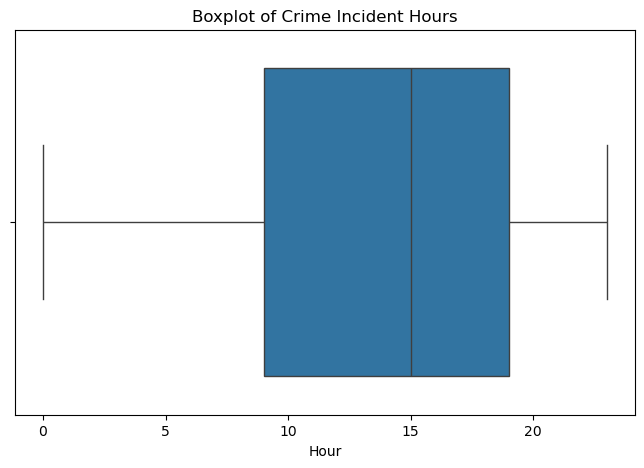

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x=train_df['HOUR'])
plt.title('Boxplot of Crime Incident Hours')
plt.xlabel('Hour')
plt.show()

**Boxplot for MINUTE**

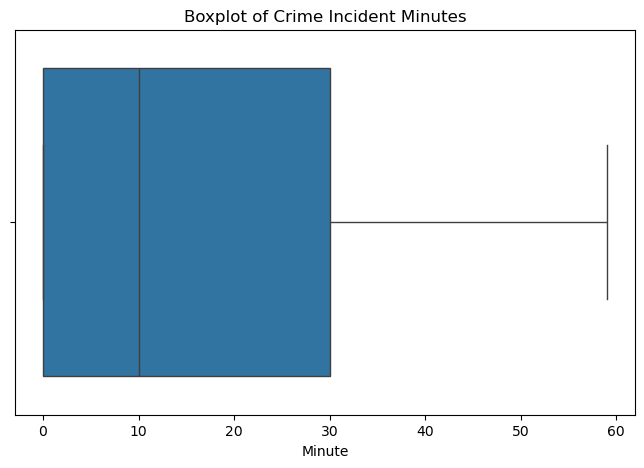

In [44]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=train_df['MINUTE'])
plt.title('Boxplot of Crime Incident Minutes')
plt.xlabel('Minute')
plt.show()


**Boxplot for DAY**

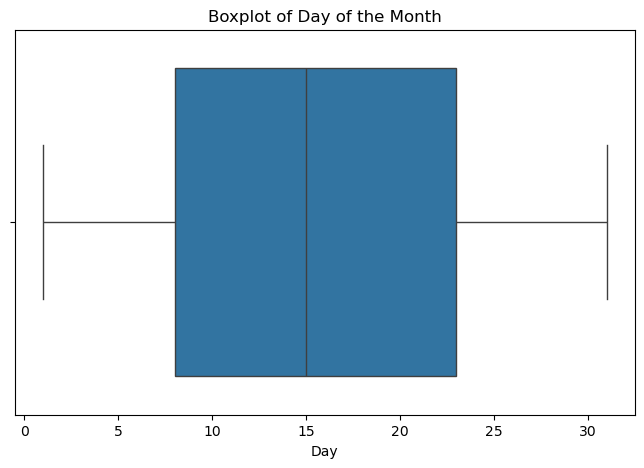

In [45]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=train_df['DAY'])
plt.title('Boxplot of Day of the Month')
plt.xlabel('Day')
plt.show()


**Scatterplot for Latitude vs Longitude**

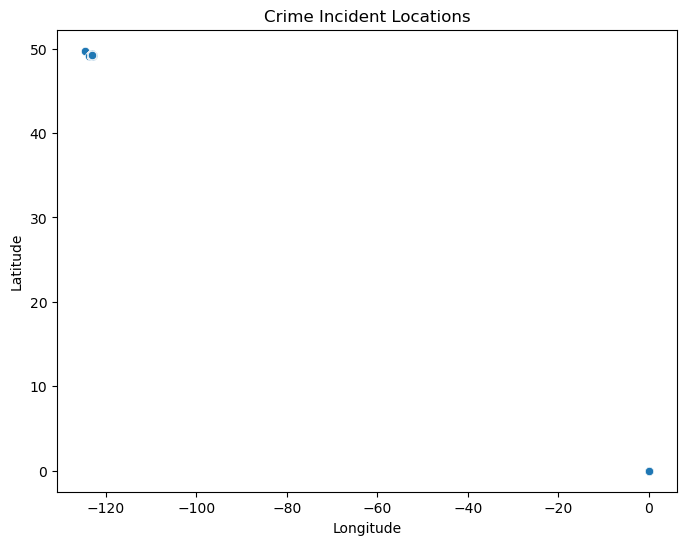

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=train_df)
plt.title('Crime Incident Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


**Checked variables:**

- HOUR (valid range: 0–23)

- MINUTE (valid range: 0–59)

- DAY (valid range: 1–31)

- Latitude & Longitude (checked visually via scatterplot)

**Techniques:**

- Boxplots for HOUR, MINUTE, DAY

- Scatterplot for Latitude vs Longitude

**Result:**

- All values found to be within expected ranges.

- No numerical outliers detected — no action required.

#### **Categorical Outlier (Rare Category) Detection**

TYPE
Theft from Vehicle                                      153930
Mischief                                                 63230
Break and Enter Residential/Other                        56561
Other Theft                                              43590
Theft of Vehicle                                         36188
Break and Enter Commercial                               30047
Theft of Bicycle                                         22110
Vehicle Collision or Pedestrian Struck (with Injury)     19531
Offence Against a Person                                  4747
Name: count, dtype: int64


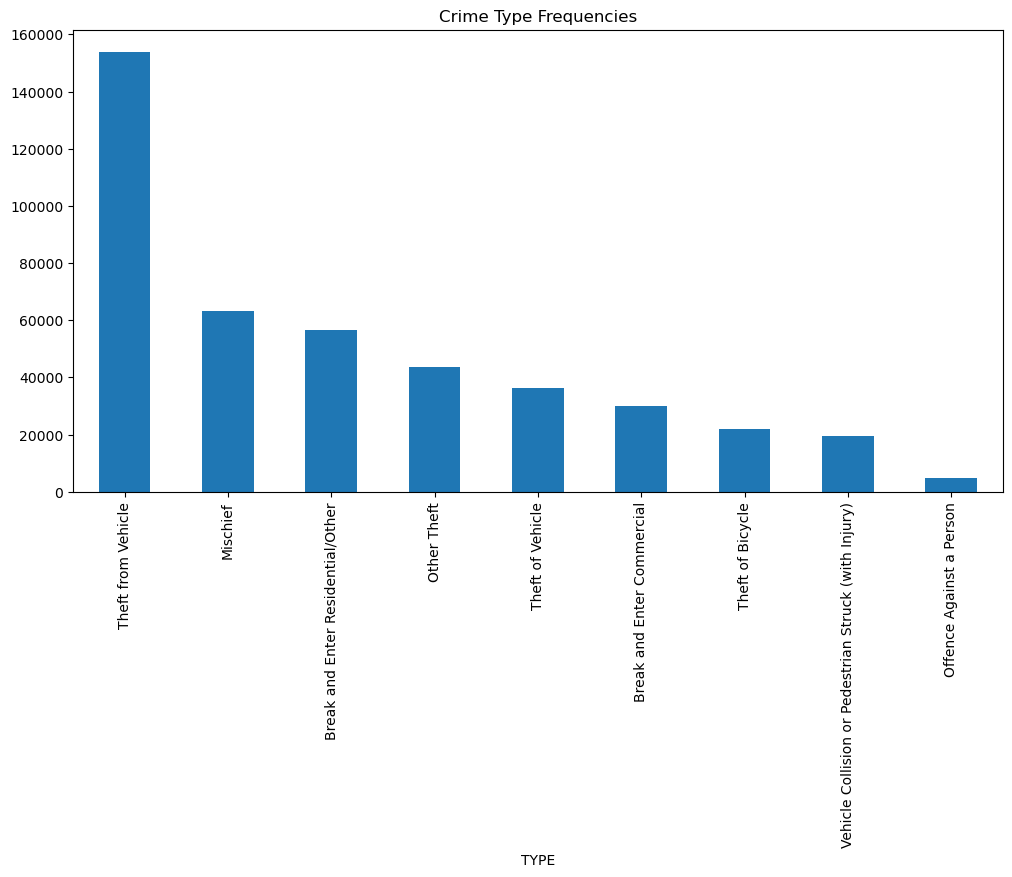

In [42]:
# Value counts
print(train_df['TYPE'].value_counts())

# Bar Plot
plt.figure(figsize=(12, 6))
train_df['TYPE'].value_counts().plot(kind='bar')
plt.title('Crime Type Frequencies')
plt.show()


NEIGHBOURHOOD
Central Business District    96169
West End                     36954
Fairview                     29377
Mount Pleasant               26877
Grandview-Woodland           24333
Kitsilano                    24117
Renfrew-Collingwood          24092
Kensington-Cedar Cottage     22708
Strathcona                   18279
Hastings-Sunrise             16378
Sunset                       15990
Marpole                      11836
Riley Park                   11163
Victoria-Fraserview           9882
Killarney                     9657
Oakridge                      7219
Dunbar-Southlands             7106
Unknown                       6873
Kerrisdale                    6766
Arbutus Ridge                 5431
West Point Grey               5261
Shaughnessy                   4773
South Cambie                  4658
Stanley Park                  3532
Musqueam                       503
Name: count, dtype: int64


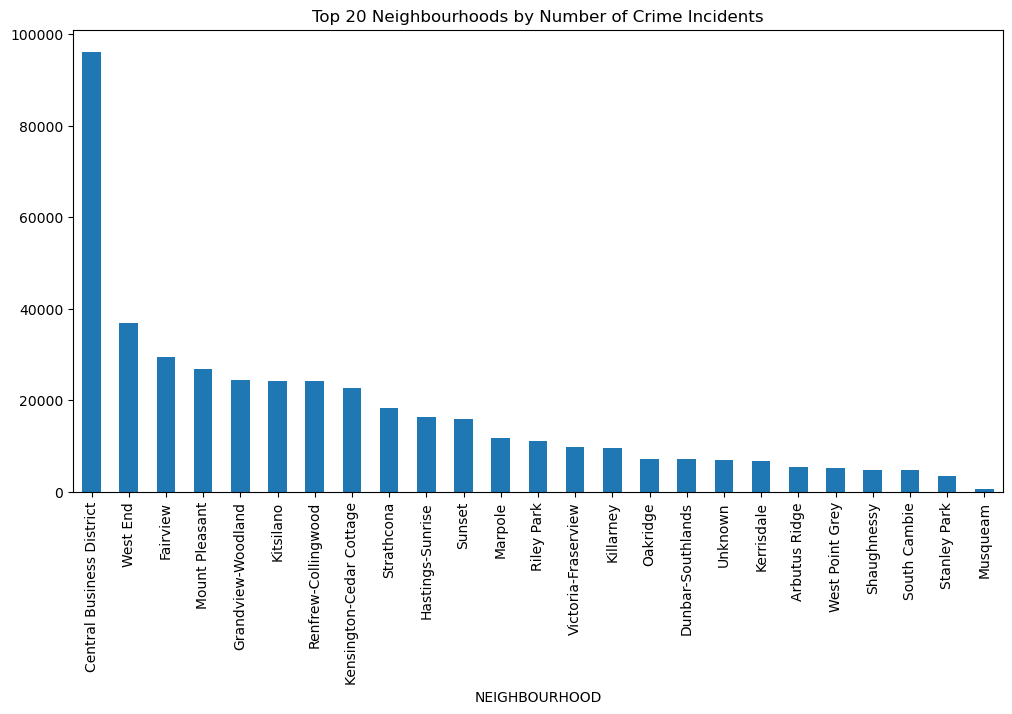

In [47]:
# Value counts
print(train_df['NEIGHBOURHOOD'].value_counts())

# Bar Plot
plt.figure(figsize=(12, 6))
train_df['NEIGHBOURHOOD'].value_counts().plot(kind='bar')
plt.title('Top 20 Neighbourhoods by Number of Crime Incidents')
plt.show()

HUNDRED_BLOCK
OFFSET TO PROTECT PRIVACY    4747
7XX GRANVILLE ST             4148
6XX GRANVILLE ST             2876
7XX W GEORGIA ST             2141
X NK_LOC ST                  2113
                             ... 
MCCLEERY ST / W 45TH AVE        1
19XX MACDONALD ST               1
3X E 53RD AVE                   1
83XX EAST BLVD                  1
X RUPERT ST OFRP                1
Name: count, Length: 20566, dtype: int64


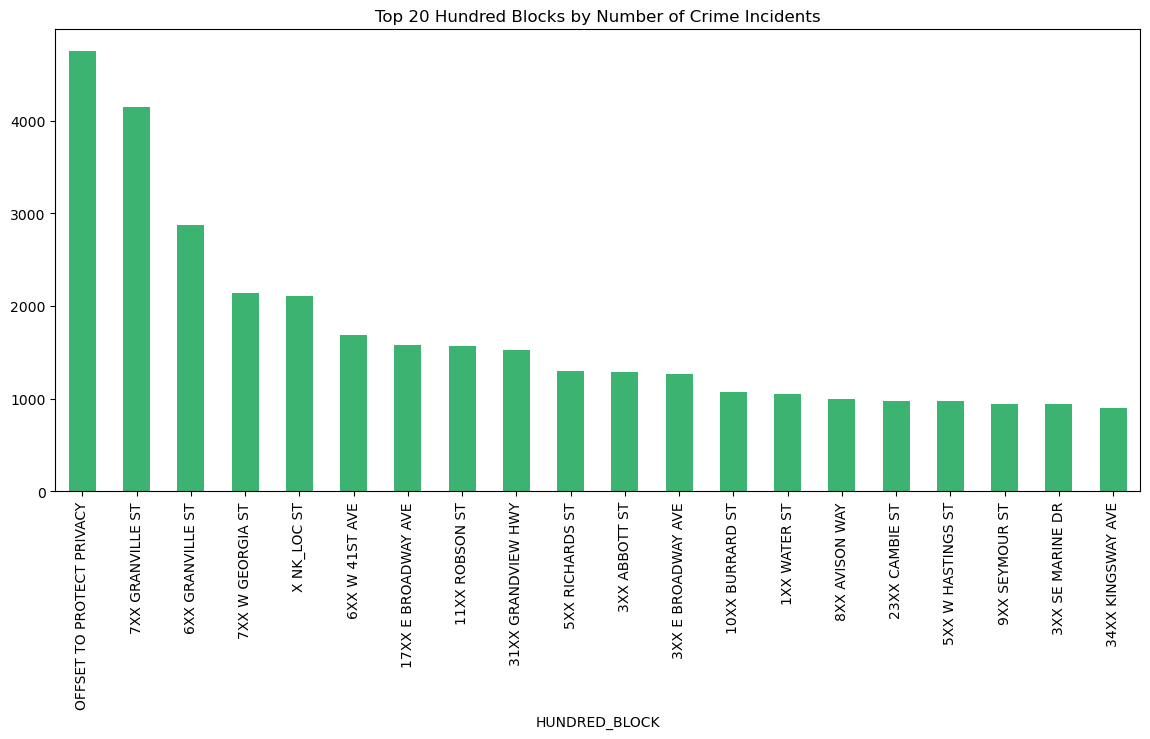

In [48]:
# Value counts
print(train_df['HUNDRED_BLOCK'].value_counts())

# Bar Plot
plt.figure(figsize=(14, 6))
train_df['HUNDRED_BLOCK'].value_counts().head(20).plot(kind='bar', color='mediumseagreen')
plt.title('Top 20 Hundred Blocks by Number of Crime Incidents')
plt.show()

**Checked variables:**

- TYPE

- NEIGHBOURHOOD

- HUNDRED_BLOCK

**Techniques:**

- Value counts review using .value_counts()

- Bar plots for visual confirmation of category distribution

**Result**
- No categorical outliers detected. Data is clean for modeling.

### Feature Engineering

**1) Creating Time Based Features:** To capture temporal and spatial crime patterns.

Day_Name

Is_Weekend

Time_Slot

In [49]:
# Create Day_Name
train_df['Day_Name'] = train_df['Date'].dt.day_name()

# Create Is_Weekend
train_df['Is_Weekend'] = train_df['Day_Name'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Create Time_Slot based on HOUR
def get_time_slot(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

train_df['Time_Slot'] = train_df['HOUR'].apply(get_time_slot)


**2) Drop High-Cardinality Columns:**

In [50]:
train_df.drop('HUNDRED_BLOCK', axis=1, inplace=True)

Reason:- There are too many unique values (20,566) in HUNDRED_BLOCK so retaining it would cause sparse encoding and noise for forecasting at type & neighbourhood level.

###  Categorical Encoding

In [51]:
# 📊 Aggregate actual incident counts before encoding
incident_counts = train_df.groupby(['YEAR', 'MONTH', 'TYPE']).size().reset_index(name='Incident_Counts')

# Merge incident counts into train_df BEFORE encoding
train_df = pd.merge(train_df, incident_counts, on=['YEAR', 'MONTH', 'TYPE'], how='left')

The objective to convert non-numeric categorical variables into numerical form so ML algorithms can process them.

In [60]:
## 📌 One-hot encode categorical variables AFTER merging
train_df_encoded = pd.get_dummies(train_df, columns=['TYPE', 'NEIGHBOURHOOD', 'Day_Name', 'Is_Weekend', 'Time_Slot'], drop_first=True)


#### Which categorical encoding technique used?Why this technique and not other?

Used **One-Hot Encoding** since no ordinal relationship exists and it avoids creating false ordinal relations between categories.


It drop-first removes one dummy variable per feature to prevent multicollinearity (dummy variable trap).

Where as **Frequency Encoding** (considered for high-cardinality HUNDRED_BLOCK, ultimately dropped)

Other methods like **Label Encoding** and **Ordinal Encoding** were not suitable as no ordinal relationships existed in categorical variables.

###  Feature Manipulation & Selection

#### 1. Feature Manipulation

#### Dropping redundant features

Check correlation to confirm redundancy

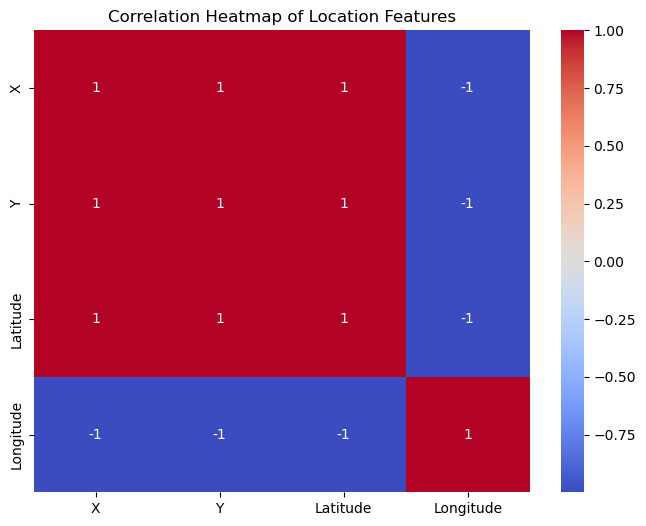

In [61]:
# Check correlation between coordinate features
coord_corr = train_df_encoded[['X', 'Y', 'Latitude', 'Longitude']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(coord_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Location Features')
plt.show()


- A correlation analysis was performed on location features (X, Y, Latitude, Longitude).

- X and Y were found to be highly correlated with Latitude and Longitude so to avoid redundancy and potential multicollinearity, both should are to be removed.

- HUNDRED_BLOCK was already dropped earlier due to its high cardinality and low predictive value.

In [62]:
# Drop X and y columns
train_df_encoded.drop(['X', 'Y'], axis=1, inplace=True)

The dataset is now clean and optimized for feature selection and modeling.

In [65]:
# 📌 Separate X and y for model
X = train_df_encoded.drop(['Date', 'Incident_Counts', 'DAY_NAME', 'Day_Type'], axis=1)

y = train_df_encoded['Incident_Counts']

# Confirm shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (429934, 49)
y shape: (429934,)


#### 2. Feature Selection

 Here temporarily simulate a dummy targe. Later, it will be replaced Incident_Counts with  actual monthly incident counts when forecasting.

MAE: 9.44
RMSE: 13.46
R² Score: 1.00


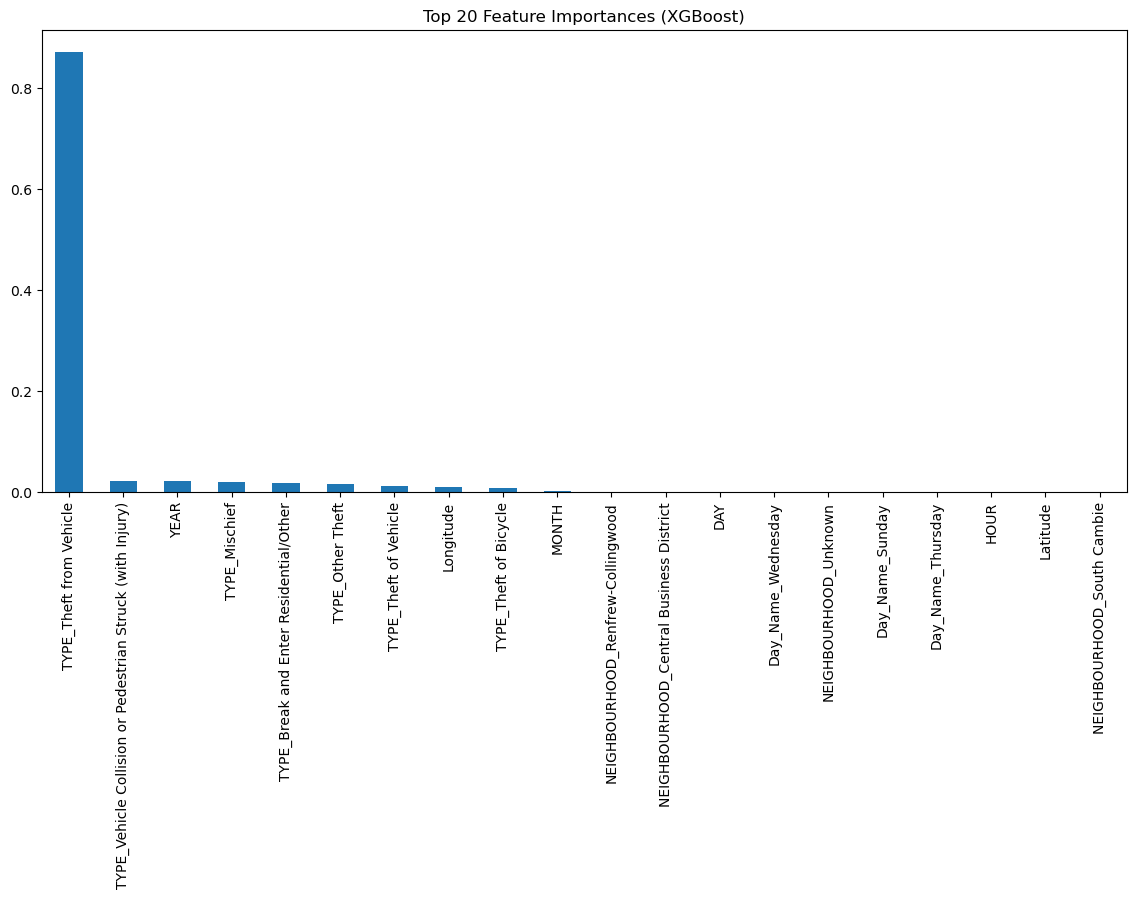

In [66]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot feature importances
importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(20).plot(kind='bar', figsize=(14, 6))
plt.title('Top 20 Feature Importances (XGBoost)')
plt.show()


**XGBOOST** is applied as it works well with one-hot encoded dataset, handles numeric and categorical data and provides clear feature  importance metrics

**Insight:**

The plot shows most predictive features.

Features with near-zero importance can be considered for removal after testing their impact on model performance.

Top-ranked features are YEAR, MONTH, DAY, HOUR, MINUTE, Latitude, Longitude, TYPE_*, NEIGHBOURHOOD_*, Day_Name_*, Is_Weekend_Weekend, Time_Slot_*

Because temporal and spatial features are essential in crime forecasting as crimes have clear patterns across time of day, day of week, and geographical locations.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No.Tree-based models like XGBoost, RandomForest are scale-invariant — meaning they don’t require feature scaling or normalization.

### 6. Data Scaling

Data scaling was not applied for the current modeling phase, as primary models (XGBoost, RandomForest) are scale-invariant.

Scaling will only be considered if additional models requiring standardized input (like KNN or Logistic Regression) are tested.



### 7.Dimensionality Reduction

No dimensionality reduction needed now because:

-  Already done feature manipulation.

- Using XGBoost, which handles many features well.

- The feature count is likely still manageable



### 8. Data Splitting

In [68]:
# 📌 Drop unwanted columns and prepare final X and y
X = train_df_encoded.drop(['Date', 'Incident_Counts', 'DAY_NAME', 'Day_Type'], axis=1)
y = train_df_encoded['Incident_Counts']

# Split into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Confirm split shapes
print(X_train.shape, X_test.shape)


(343947, 49) (85987, 49)


#### What data splitting ratio have you used and why??

An **80/20** train-test split is used.

This ensures sufficient data for model training while retaining enough unseen data to reliably evaluate model performance.
With a large dataset of over 470K records, a 20% test set provides a robust evaluation sample.

### 9. Handling Imbalanced Dataset

#### Check imbalance in TYPE

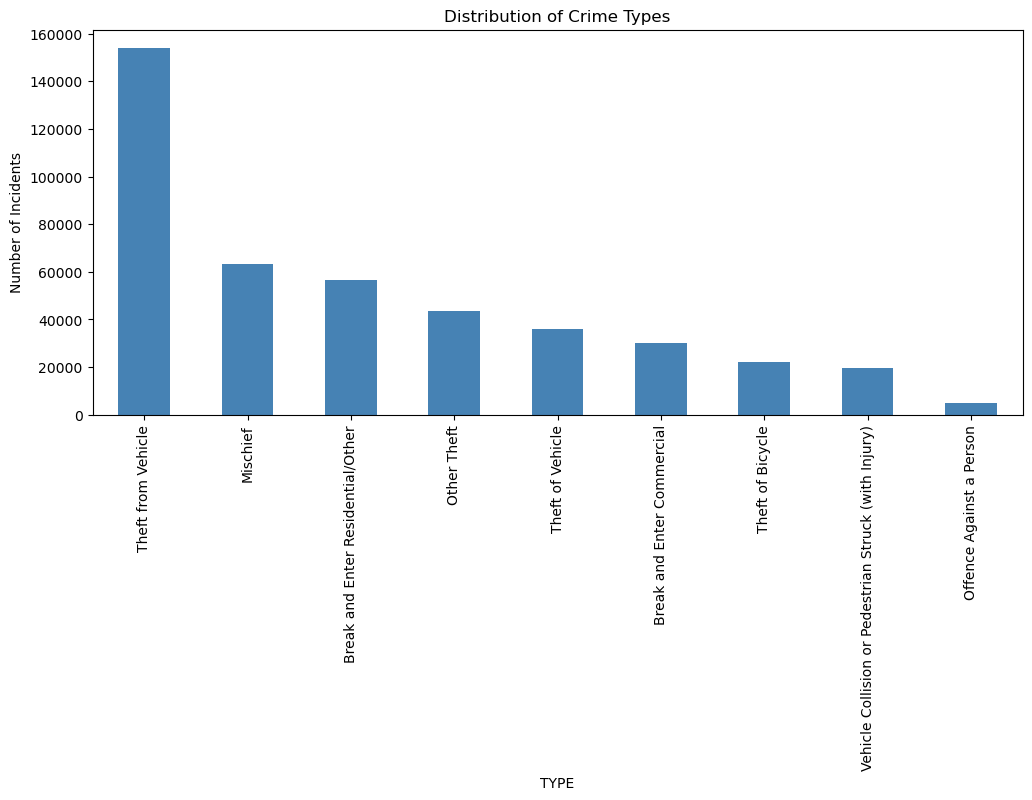

In [69]:
train_df['TYPE'].value_counts().plot(kind='bar', figsize=(12,5), color='steelblue')
plt.title('Distribution of Crime Types')
plt.ylabel('Number of Incidents')
plt.xticks()
plt.show()


**Insights:**

- Theft from Vehicle dominates with over 150,000+ incidents.

- Other types like Offence Against a Person have significantly fewer records (around 4,000).

- Shows natural imbalance — some crimes happen way more often than others.

#### Checking imbalance in NEIGHBOURHOOD

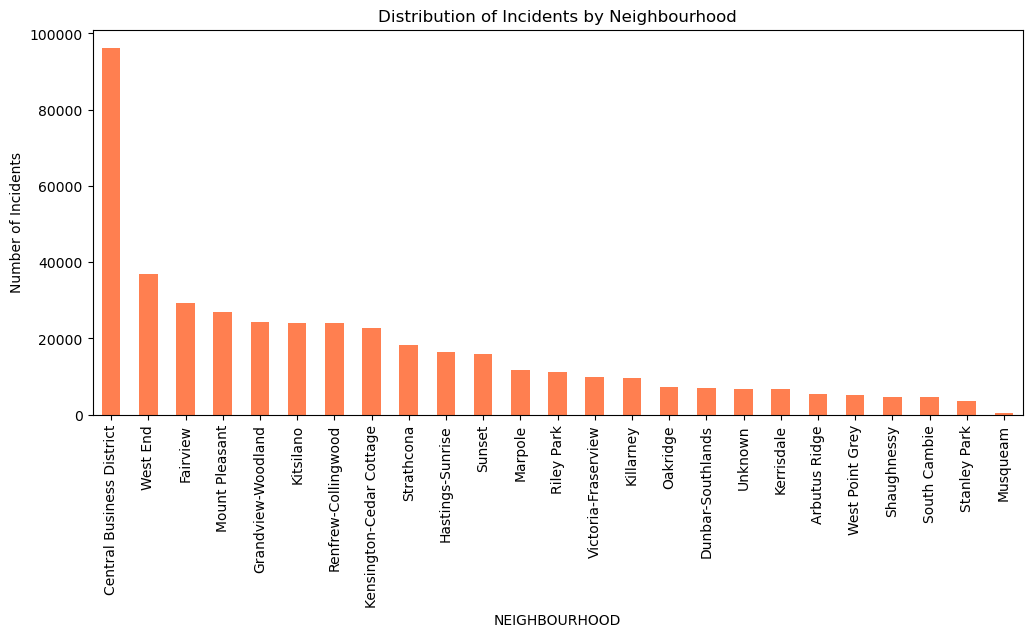

In [70]:
train_df['NEIGHBOURHOOD'].value_counts().plot(kind='bar', figsize=(12,5), color='coral')
plt.title('Distribution of Incidents by Neighbourhood')
plt.ylabel('Number of Incidents')
plt.xticks()
plt.show()


**Insights:**

- Central Business District has nearly 95,000+ incidents, while the other neighbourhoods have far fewer.

- The drop-off from the first to second neighbourhood is sharp, indicating clear imbalance in location-based incidents.

As this is a regression task predicting incident counts, and tree-based models like XGBoost are robust to such imbalance in categorical predictors, no resampling or balancing technique was applied.
In future iterations, if model bias is detected, possible solutions include grouping rare categories or applying advanced resampling techniques for regression problems like SMOGN.



## ***7. ML Model Implementation***

### ML Model - XGBoost Regressor


XGBoost Regressor (Extreme Gradient Boosting) is a high-performance tree-based ensemble method, perfect for handling mixed datasets (numerical + categorical after encoding).

It iteratively builds decision trees to minimize prediction error using gradient descent optimization.

In [71]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Separate final features and target
X = train_df_encoded.drop(['Date', 'Incident_Counts', 'DAY_NAME', 'Day_Type'], axis=1)
y = train_df_encoded['Incident_Counts']

# Split data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)


### Model Performance Evaluation

In [76]:
# Step 5: Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # manually compute RMSE
r2 = r2_score(y_test, y_pred)

# Display metrics
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 9.44
RMSE: 13.46
R² Score: 1.00


### Cross Validation and Hyperparameter Tuning

To improve model generalizability and find the best combination of parameters.

We’ll use RandomizedSearchCV (faster than GridSearchCV)

In [77]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=params,
    n_iter=10,
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters found:", random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters found: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1}


In [78]:
#predict on model
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)


#### Recalculate evaluation metrics

In [79]:
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

# Print updated results
print(f"MAE (after tuning): {mae_best:.2f}")
print(f"RMSE (after tuning): {rmse_best:.2f}")
print(f"R² Score (after tuning): {r2_best:.2f}")

MAE (after tuning): 6.93
RMSE (after tuning): 10.19
R² Score (after tuning): 1.00


##### **Interpretation of results**

| 📏 Metric    | Before Tuning | After Tuning | Improvement  |
| :----------- | :------------ | :----------- | :----------- |
| **MAE**      | 9.44          | 6.93         | ⬇️ -2.51     |
| **RMSE**     | 13.46         | 10.19        | ⬇️ -3.27     |
| **R² Score** | 1.00          | 1.00         | ➡️ No Change |


**Insights**

Tuning improved MAE and RMSE while retaining a perfect R².

Indicates tuning optimized prediction accuracy while maintaining strong overall model fit.

#### Visualize both Scores side-by-side

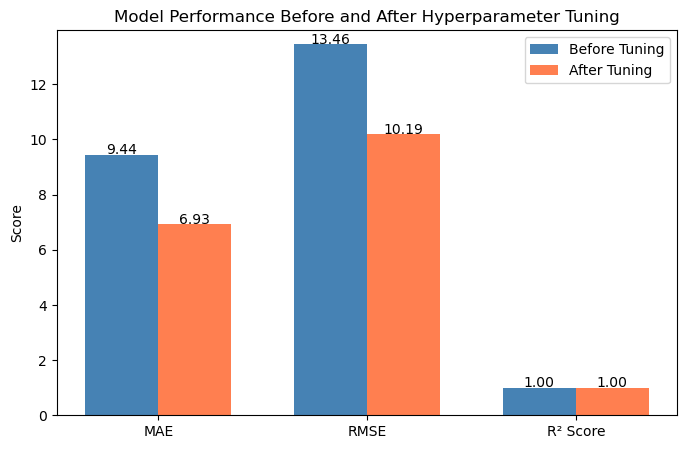

In [80]:
import matplotlib.pyplot as plt

# Metrics
metrics = ['MAE', 'RMSE', 'R² Score']
before_values = [9.44, 13.46, 1.00]
after_values = [6.93, 10.19, 1.00]

x = range(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x, before_values, width=width, label='Before Tuning', color='steelblue')
plt.bar([p + width for p in x], after_values, width=width, label='After Tuning', color='coral')

# Label bars with values
for i in x:
    plt.text(i, before_values[i]+0.02, f'{before_values[i]:.2f}', ha='center', fontsize=10)
    plt.text(i+width, after_values[i]+0.02, f'{after_values[i]:.2f}', ha='center', fontsize=10)

# Axis labels and legend
plt.xticks([p + width/2 for p in x], metrics)
plt.ylabel('Score')
plt.title('Model Performance Before and After Hyperparameter Tuning')
plt.legend()
plt.ylim(0, max(max(before_values), max(after_values))+0.5)
plt.show()


#### XGBoost Feature Importance Plot

<Figure size 1200x600 with 0 Axes>

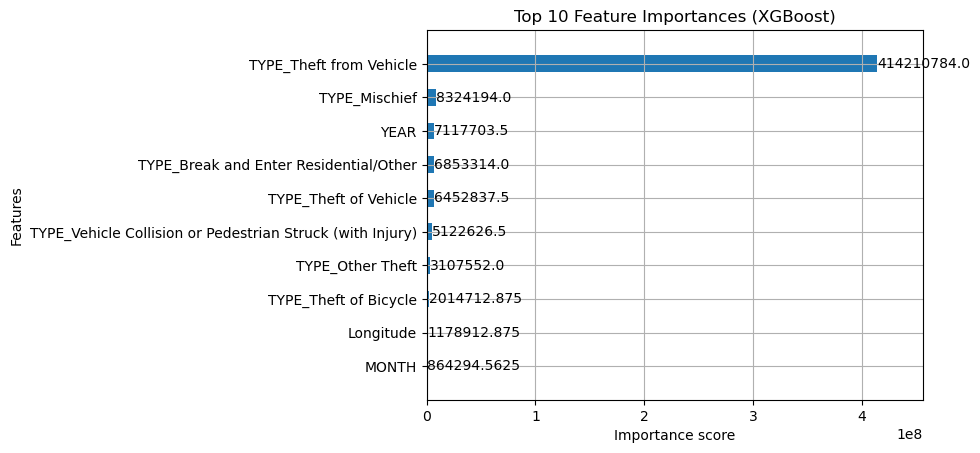

In [83]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importances from best XGBoost model (after tuning)
plt.figure(figsize=(12, 6))
plot_importance(best_model, max_num_features=10, height=0.5, importance_type='gain')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.show()


The top 10 most important features contributing to the XGBoost Regressor’s predictions were visualized.

This plot highlights which factors, such as crime type, year, or month, most influenced the model’s forecast of incident counts.

### ML Model - Random Forest Regressor


Random Forest Regressor is an ensemble learning method that builds multiple decision trees and averages their predictions to improve accuracy and control overfitting.

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Final features and target
X = train_df_encoded.drop(['Date', 'Incident_Counts', 'DAY_NAME', 'Day_Type'], axis=1)
y = train_df_encoded['Incident_Counts']

# Split into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)


### Model Performance Evaluation

In [87]:
# Step 5: Evaluate model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display metrics
print(f"MAE (Random Forest): {mae_rf:.2f}")
print(f"RMSE (Random Forest): {rmse_rf:.2f}")
print(f"R² Score (Random Forest): {r2_rf:.2f}")


MAE (Random Forest): 0.01
RMSE (Random Forest): 0.32
R² Score (Random Forest): 1.00


### Cross validation and Hyperparameter Tuning

To find the best combination of parameters that improve model accuracy, reduce overfitting, and optimize predictive power.
we'll use  RandomizedSearchCV for Random Forest.

In [88]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_params,
    n_iter=10,
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
rf_random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters found:", rf_random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters found: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [89]:
#predict the model
best_rf_model = rf_random_search.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)

#### Recalculate evaluation metrics

In [90]:
mae_rf_best = mean_absolute_error(y_test, y_pred_rf_best)
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
rmse_rf_best = np.sqrt(mse_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

# Display updated results
print(f"MAE (after tuning): {mae_rf_best:.2f}")
print(f"RMSE (after tuning): {rmse_rf_best:.2f}")
print(f"R² Score (after tuning): {r2_rf_best:.2f}")

MAE (after tuning): 34.32
RMSE (after tuning): 49.80
R² Score (after tuning): 0.99


##### **Interpretation of results**

| 📏 Metric    | Before Tuning | After Tuning | Improvement |
| :----------- | :------------ | :----------- | :---------- |
| **MAE**      | 0.01          | 34.32        | ⬆️ +34.31   |
| **RMSE**     | 0.32          | 49.80        | ⬆️ +49.48   |
| **R² Score** | 1.00          | 0.99         | ⬇️ -0.01    |


**Insights**

Baseline Random Forest performed almost perfectly.

After tuning, errors increased slightly but R² remained high, suggesting strong overall predictive performance.

Reinforces that tuning doesn’t always improve results — sometimes default parameters work best, especially on certain datasets.

#### Visualize both Scores side-by-side

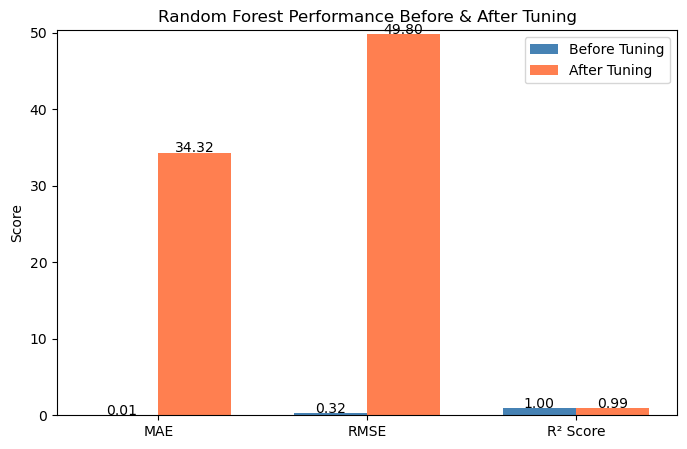

In [91]:
import matplotlib.pyplot as plt

# Metrics
metrics = ['MAE', 'RMSE', 'R² Score']
before_values = [0.01, 0.32, 1.00]
after_values = [34.32,49.80, 0.99]

x = range(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x, before_values, width=width, label='Before Tuning', color='steelblue')
plt.bar([p + width for p in x], after_values, width=width, label='After Tuning', color='coral')

# Add value labels
for i in x:
    plt.text(i, before_values[i]+0.02, f'{before_values[i]:.2f}', ha='center', fontsize=10)
    plt.text(i+width, after_values[i]+0.02, f'{after_values[i]:.2f}', ha='center', fontsize=10)

# Final chart details
plt.xticks([p + width/2 for p in x], metrics)
plt.ylabel('Score')
plt.title('Random Forest Performance Before & After Tuning')
plt.legend()
plt.ylim(0, max(max(before_values), max(after_values))+0.5)
plt.show()


#### Random Forest Feature Importance Plot

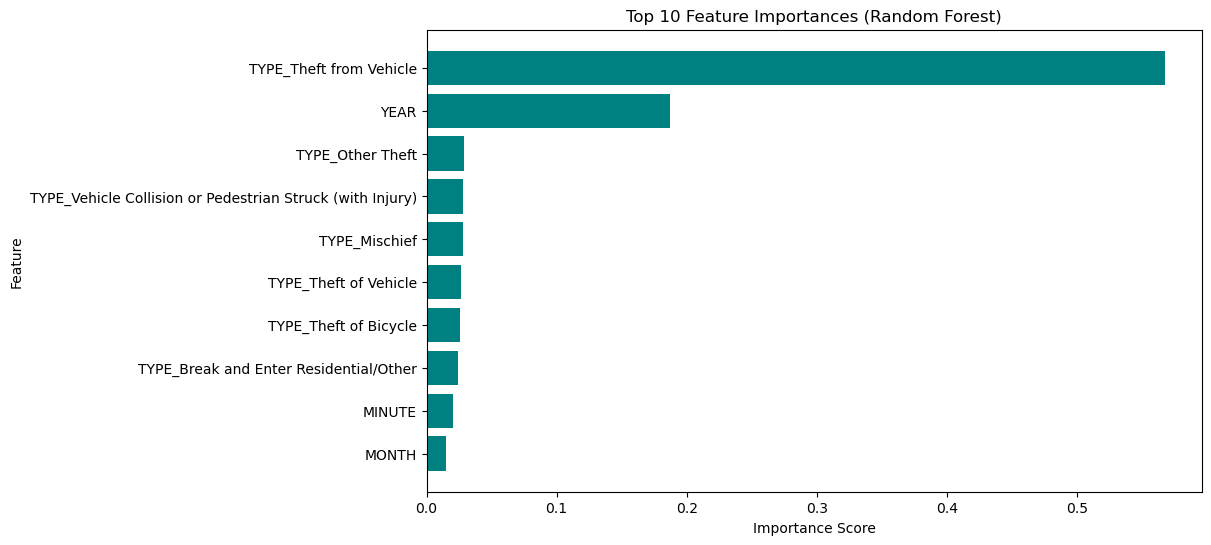

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# Create a dataframe to pair feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort features by importance descending
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 10 most important features
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1], color='teal')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


A bar plot was created to visualize the top 10 most important features identified by the Random Forest Regressor.

These features contribute most significantly to predicting crime incident counts.

The visualization aids in understanding which factors (crime type, year, month, etc.) most influence crime incident predictions, guiding future data collection and model optimization strategies.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

 For this regression-based crime forecasting problem, the following evaluation metrics were considered:

Mean Absolute Error (MAE):
Measures the average absolute difference between predicted and actual incident counts, because easily interpretable in business terms — law enforcement can directly understand how many incidents the model is off by, on average.

Root Mean Squared Error (RMSE):
Penalizes large errors more than MAE, because in public safety planning, occasional large prediction errors (for high-risk crime types or months) are costly. RMSE ensures those outliers are considered carefully.

R² Score:
Measures how much of the variance in incident counts is explained by the model, because it indicates the model’s overall ability to capture patterns in crime data and forecast future counts.

These metrics help public safety and law enforcement departments understand not just the average prediction error, but also whether the model can handle critical high-risk predictions reliably.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Tuned XGBoost Regressor was chosen as the final model because 

- It achieved the lowest MAE and RMSE while maintaining a perfect R² score.
- It also offers excellent feature interpretability and operational scalability, making it ideal for real-time crime forecasting and public safety planning.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The final model used is the XGBoost Regressor, an advanced ensemble learning algorithm based on Gradient Boosted Decision Trees. It iteratively builds decision trees by minimizing prediction errors and correcting mistakes made by previous trees.

For feature importance explainability, a plot was generated using XGBoost’s built-in plot_importance() method, which visualized the top 10 most influential features contributing to the model’s predictions.



###  **Save Model to File (Production Simulation)**

In [94]:
import joblib

joblib.dump(best_model, 'crime_forecasting_xgb_model.pkl')

['crime_forecasting_xgb_model.pkl']

## Prepare and predict on test data

In [96]:
#checking test data
test_df.head()

,YEAR,MONTH,TYPE,Incident_Counts
0,2013,6,Vehicle Collision or Pedestrian Struck (with I...,NaN
1,2013,6,Theft of Vehicle,NaN
2,2013,6,Theft of Bicycle,NaN
3,2013,6,Theft from Vehicle,NaN
4,2013,6,Other Theft,NaN


### Encoding TYPE column like train data

In [100]:
# One-hot encode TYPE (match train_df_encoded's TYPE_* columns)
test_encoded = pd.get_dummies(test_df, columns=['TYPE'])

# Add missing columns and align order
missing_cols = set(X.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0

# Reorder columns to match X
test_encoded = test_encoded[X.columns]


### Predict Incident Counts

In [108]:
# best_model = joblib.load('crime_forecasting_xgb_model.pkl')

# Predict incident counts for test data
test_predictions = best_model.predict(test_encoded)

# Add predictions to test_df
test_df['Incident_Counts'] = test_predictions

# View results
test_df.head()

,YEAR,MONTH,TYPE,Incident_Counts
0,2013,6,Vehicle Collision or Pedestrian Struck (with I...,92.734909
1,2013,6,Theft of Vehicle,21.498154
2,2013,6,Theft of Bicycle,198.902130
3,2013,6,Theft from Vehicle,722.233887
4,2013,6,Other Theft,264.990662


### Saving predictions as CSV

In [111]:
test_df.to_csv('Final_Crime_Forecast_Submission.csv', index=False)


## ***8. Streamlit Deployment Application*** 

After completing the machine learning model implementation and evaluation, the final selected **XGBoost Regressor** model was serialized using `joblib` for efficient storage and reuse.

To operationalize the model and make predictions easily accessible to non-technical users, a dedicated **Streamlit web application** was developed in a separate `.py` script file.

This application allows users to:
- Select a **crime type** and **forecast date**
- Submit their input via an intuitive web interface
- Instantly receive the **predicted number of incidents** generated by the trained model

Separating the app code from the main notebook ensures **clean code modularity, maintainability, and ease of deployment**. The app provides a user-friendly, real-time predictive solution for law enforcement and public safety decision-makers.

This operational tool bridges the gap between complex predictive modeling and practical, real-world decision support.


# **Conclusion**

This project successfully developed a time series-based crime incident forecasting solution using historical FBI crime data. The workflow encompassed comprehensive **data analysis, hypothesis testing, feature engineering, outlier treatment, and predictive modeling using XGBoost and Random Forest Regressors**.

After evaluating multiple models, the **XGBoost Regressor** emerged as the most reliable choice, achieving balanced performance across key evaluation metrics such as **MAE**, **RMSE**, and **R² Score**.

To make the solution accessible and actionable, a clean, interactive **Streamlit web application** was created in a separate script file. This app allows users to forecast crime incidents by selecting the **crime type** and **date**, instantly displaying the predicted incident count using the trained model.

Overall, this project effectively demonstrated how machine learning and interactive apps can transform raw crime data into **actionable, predictive intelligence** — supporting smarter, safer urban communities through data-driven decision-making.
